In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle

from keras.models import Sequential
from keras.layers import Dense, LSTM, SimpleRNN, GRU, Input, Flatten, concatenate
from keras import Model
from keras.metrics import RootMeanSquaredError

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

### Load data

In [52]:
df = None
with open("covid_flow.pkl", "rb") as f:
    df = pickle.load(f)
df["case"] = df.index
df["t_point"] = df["t_point"].apply(lambda x: x[2:])
df["t_point"] = df["t_point"].apply(lambda x: int(x))
df.set_index(["case", "t_point"], inplace=True)
df = df.sort_values(["case", "t_point"])

#### Function which shows results of model

In [53]:
# Function which shows results of model
def show_results(X_test, y_test, model, history, batch_size=None, sample_num = 0):
    plt.plot(history.history["loss"])
    plt.plot(history.history["val_loss"])
    plt.legend(["train loss", "validation loss"])

    y_pred = model.predict(X_test, batch_size=batch_size, verbose=0)

    r2_scor = r2_score(y_test, y_pred, multioutput="raw_values")
    mse_score = mean_squared_error(y_test, y_pred, multioutput="raw_values")

    table=[]
    table.append(mse_score)
    table.append(r2_scor)

    df_score = pd.DataFrame(table, ["MSE", "R2"], columns=df.columns[29:42])
    df_score.to_csv("reports_w2/"+model.name+".csv")
    model.save("models_w2/"+model.name)
    display(df_score)
    plt.show()
    

## Train Models

#### Window 2

In [54]:
import prepare_data_covid as datacovid
(X_train, y_train), (X_test, y_test), (X_val, y_val) = \
datacovid.prepare_dynamic(df_input=df, window=2)
(X_train, y_train), (X_test, y_test), (X_val, y_val) =\
    (X_train[5:], y_train[5:]), (X_test[2:], y_test[2:]), (X_val[2:], y_val[2:])
X_train.shape

TRAIN shape:  (1805, 2, 13)
TEST shape:  (226, 13)
VAL shape:  (226, 13)


(1800, 2, 13)

#### FNN

Faltten1Layer

Model: "Faltten1Layer"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 26)                0         
                                                                 
 dense_51 (Dense)            (None, 32)                864       
                                                                 
 dense_52 (Dense)            (None, 13)                429       
                                                                 
Total params: 1,293
Trainable params: 1,293
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
57/57 [==============================] - 0s 4ms/step - loss: 0.0553 - val_loss: 0.0201
Epoch 2/30
57/57 [==============================] - 0s 1ms/step - loss: 0.0182 - val_loss: 0.0152
Epoch 3/30
57/57 [==============================] - 0s 1ms/step - loss: 0.0146 - val_loss: 0.0126
Epoch 4/30
57/57 [===

INFO:tensorflow:Assets written to: models_w2/Faltten1Layer\assets


,Температура_dinam_fact,Лимфоциты#_dinam_fact,АСТ_dinam_fact,ЧСС_dinam_fact,ЧДД_dinam_fact,Билирубин общий_dinam_fact,MPV- Средн.объем тромбоцитов_dinam_fact,PCT- Тромбокрит_dinam_fact,Лимфоциты%_dinam_fact,снижение_сознания_dinam_fact,Cтепень тяжести по КТ_dinam_fact,Лактатдегидрогеназа_dinam_fact,PDW- Индекс расп.по объему тр._dinam_fact
MSE,0.001972,0.00024,0.000408,0.011614,0.000485,0.001956,0.005194,0.004477,0.008642,0.013124,0.057050,0.000390,0.005206
R2,-0.330817,-1.07413,0.031015,-0.087199,-0.902803,-0.235216,0.600813,0.399944,0.429584,0.759937,-0.038781,0.385323,0.597405


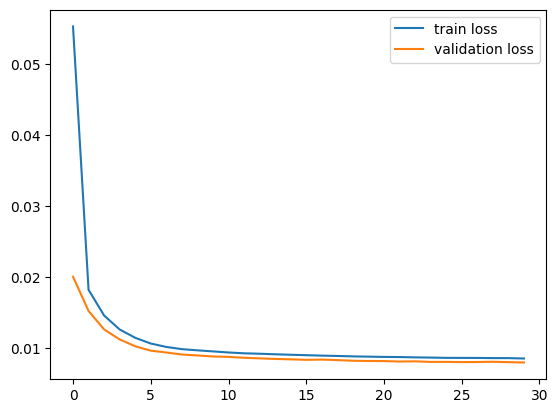

In [55]:
PARAMS_LENGTH = X_train.shape[2]
WINDOW=X_train.shape[1]
model = Sequential(name="Faltten1Layer")
model.add(Input((WINDOW, PARAMS_LENGTH)))
model.add(Flatten())
model.add(Dense(32, activation="relu"))
model.add(Dense(PARAMS_LENGTH, activation="linear"))
model.compile(optimizer="adam", loss="mse")
model.summary()
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val))
show_results(X_test, y_test, model, history)

Flatten3Layers

Use more deep NN

Model: "Flatten3Layers"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 26)                0         
                                                                 
 dense_53 (Dense)            (None, 26)                702       
                                                                 
 dense_54 (Dense)            (None, 16)                432       
                                                                 
 dense_55 (Dense)            (None, 13)                221       
                                                                 
 dense_56 (Dense)            (None, 13)                182       
                                                                 
Total params: 1,537
Trainable params: 1,537
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
57/57 [==============================] 

INFO:tensorflow:Assets written to: models_w2/Flatten3Layers\assets


,Температура_dinam_fact,Лимфоциты#_dinam_fact,АСТ_dinam_fact,ЧСС_dinam_fact,ЧДД_dinam_fact,Билирубин общий_dinam_fact,MPV- Средн.объем тромбоцитов_dinam_fact,PCT- Тромбокрит_dinam_fact,Лимфоциты%_dinam_fact,снижение_сознания_dinam_fact,Cтепень тяжести по КТ_dinam_fact,Лактатдегидрогеназа_dinam_fact,PDW- Индекс расп.по объему тр._dinam_fact
MSE,0.001822,0.000424,0.000841,0.011566,0.000295,0.001604,0.006457,0.006746,0.010754,0.013347,0.055782,0.000562,0.007241
R2,-0.229345,-2.665105,-0.994488,-0.082690,-0.156210,-0.013112,0.503787,0.095831,0.290192,0.755846,-0.015692,0.113528,0.440003


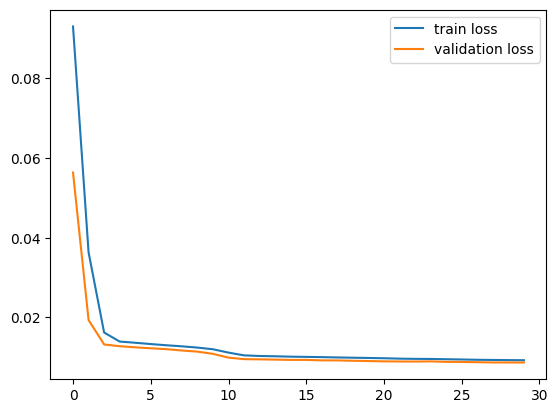

In [56]:
model = Sequential(name="Flatten3Layers")
model.add(Input((WINDOW, PARAMS_LENGTH)))
model.add(Flatten())
model.add(Dense(WINDOW*PARAMS_LENGTH, activation="relu"))
model.add(Dense(16, activation="relu"))
model.add(Dense(PARAMS_LENGTH, activation="relu"))
model.add(Dense(PARAMS_LENGTH, activation="linear"))
model.compile(optimizer="adam", loss="mse")
model.summary()
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val))
show_results(X_test, y_test, model, history)

#### RNN

Simple RNN with linear activation 

Model: "SimpleRNN13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 13)                351       
                                                                 
 dense_57 (Dense)            (None, 13)                182       
                                                                 
Total params: 533
Trainable params: 533
Non-trainable params: 0
_________________________________________________________________
INFO:tensorflow:Assets written to: models_w2/SimpleRNN13\assets


INFO:tensorflow:Assets written to: models_w2/SimpleRNN13\assets


,Температура_dinam_fact,Лимфоциты#_dinam_fact,АСТ_dinam_fact,ЧСС_dinam_fact,ЧДД_dinam_fact,Билирубин общий_dinam_fact,MPV- Средн.объем тромбоцитов_dinam_fact,PCT- Тромбокрит_dinam_fact,Лимфоциты%_dinam_fact,снижение_сознания_dinam_fact,Cтепень тяжести по КТ_dinam_fact,Лактатдегидрогеназа_dinam_fact,PDW- Индекс расп.по объему тр._dinam_fact
MSE,0.002378,0.000377,0.000291,0.011423,0.000295,0.001551,0.005806,0.005107,0.010065,0.014130,0.056365,0.000539,0.005596
R2,-0.604751,-2.261484,0.310286,-0.069344,-0.156701,0.020197,0.553785,0.315535,0.335686,0.741521,-0.026298,0.149590,0.567194


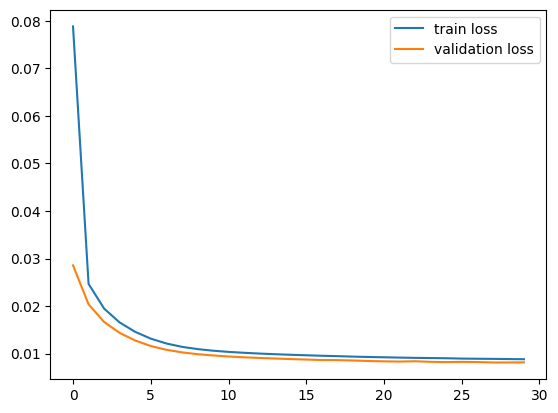

In [57]:
model = Sequential(name="SimpleRNN13")
model.add(Input((WINDOW, PARAMS_LENGTH)))
model.add(SimpleRNN(PARAMS_LENGTH, return_sequences=False))
model.add(Dense(PARAMS_LENGTH, activation="linear"))
model.compile(optimizer="adam", loss="mse")
model.summary()
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val), verbose=0)
show_results(X_test, y_test, model, history)

SimpleRNN sigmoid

Model: "SimpleRNN13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 13)                351       
                                                                 
 dense_58 (Dense)            (None, 13)                182       
                                                                 
Total params: 533
Trainable params: 533
Non-trainable params: 0
_________________________________________________________________
INFO:tensorflow:Assets written to: models_w2/SimpleRNN13\assets


INFO:tensorflow:Assets written to: models_w2/SimpleRNN13\assets


,Температура_dinam_fact,Лимфоциты#_dinam_fact,АСТ_dinam_fact,ЧСС_dinam_fact,ЧДД_dinam_fact,Билирубин общий_dinam_fact,MPV- Средн.объем тромбоцитов_dinam_fact,PCT- Тромбокрит_dinam_fact,Лимфоциты%_dinam_fact,снижение_сознания_dinam_fact,Cтепень тяжести по КТ_dinam_fact,Лактатдегидрогеназа_dinam_fact,PDW- Индекс расп.по объему тр._dinam_fact
MSE,0.001473,0.000218,0.000355,0.010803,0.000224,0.001816,0.006628,0.007419,0.013149,0.013738,0.055247,0.000544,0.006926
R2,0.005865,-0.888123,0.157949,-0.011296,0.120351,-0.147089,0.490672,0.005683,0.132166,0.748699,-0.005950,0.142522,0.464351


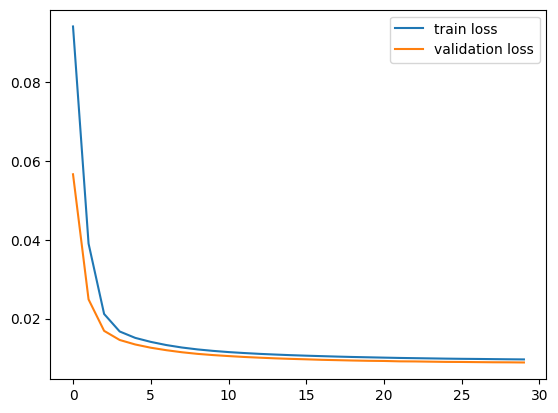

In [58]:
PARAMS_LENGTH = X_train.shape[2]
WINDOW = X_train.shape[1]
model = Sequential(name="SimpleRNN13")
model.add(Input((WINDOW, PARAMS_LENGTH)))
model.add(SimpleRNN(PARAMS_LENGTH, return_sequences=False))
model.add(Dense(PARAMS_LENGTH, activation="sigmoid"))
model.compile(optimizer="adam", loss="mse")
model.summary()
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val), verbose=0)
show_results(X_test, y_test, model, history)

SimpleRNN with Tanh activation

Model: "SimpleRNN13_Tanh"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (None, 13)                351       
                                                                 
 dense_59 (Dense)            (None, 13)                182       
                                                                 
Total params: 533
Trainable params: 533
Non-trainable params: 0
_________________________________________________________________
INFO:tensorflow:Assets written to: models_w2/SimpleRNN13_Tanh\assets


INFO:tensorflow:Assets written to: models_w2/SimpleRNN13_Tanh\assets


,Температура_dinam_fact,Лимфоциты#_dinam_fact,АСТ_dinam_fact,ЧСС_dinam_fact,ЧДД_dinam_fact,Билирубин общий_dinam_fact,MPV- Средн.объем тромбоцитов_dinam_fact,PCT- Тромбокрит_dinam_fact,Лимфоциты%_dinam_fact,снижение_сознания_dinam_fact,Cтепень тяжести по КТ_dinam_fact,Лактатдегидрогеназа_dinam_fact,PDW- Индекс расп.по объему тр._dinam_fact
MSE,0.001627,0.000282,0.000398,0.010829,0.000223,0.001553,0.008975,0.006767,0.012322,0.014292,0.054902,0.000536,0.007630
R2,-0.097900,-1.442259,0.054605,-0.013719,0.127111,0.019077,0.310259,0.093083,0.186716,0.738569,0.000336,0.155766,0.409962


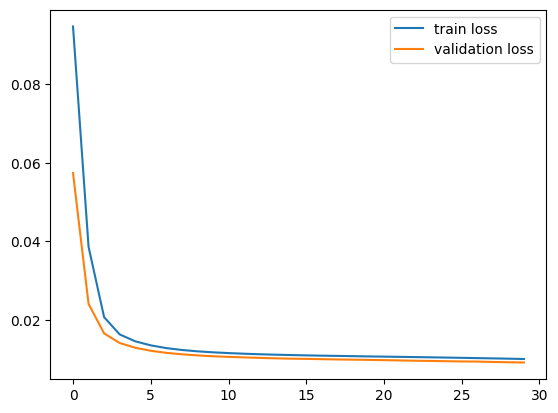

In [59]:
model = Sequential(name="SimpleRNN13_Tanh")
model.add(Input((WINDOW, PARAMS_LENGTH)))
model.add(SimpleRNN(PARAMS_LENGTH, return_sequences=False))
model.add(Dense(PARAMS_LENGTH, activation="sigmoid"))
model.compile(optimizer="adam", loss="mse")
model.summary()
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val),  verbose=0)
show_results(X_test, y_test, model, history)

Model: "6_LSTM13_Batch8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (8, 13)                   1404      
                                                                 
 dense_60 (Dense)            (8, 13)                   182       
                                                                 
Total params: 1,586
Trainable params: 1,586
Non-trainable params: 0
_________________________________________________________________


INFO:tensorflow:Assets written to: models_w2/6_LSTM13_Batch8\assets


INFO:tensorflow:Assets written to: models_w2/6_LSTM13_Batch8\assets


,Температура_dinam_fact,Лимфоциты#_dinam_fact,АСТ_dinam_fact,ЧСС_dinam_fact,ЧДД_dinam_fact,Билирубин общий_dinam_fact,MPV- Средн.объем тромбоцитов_dinam_fact,PCT- Тромбокрит_dinam_fact,Лимфоциты%_dinam_fact,снижение_сознания_dinam_fact,Cтепень тяжести по КТ_dinam_fact,Лактатдегидрогеназа_dinam_fact,PDW- Индекс расп.по объему тр._dinam_fact
MSE,0.001539,0.000203,0.000184,0.011395,0.000174,0.001635,0.005560,0.004729,0.008436,0.013267,0.057756,0.000382,0.005151
R2,-0.038536,-0.755868,0.564323,-0.066672,0.319208,-0.032956,0.572703,0.366147,0.443177,0.757320,-0.051632,0.398037,0.601617


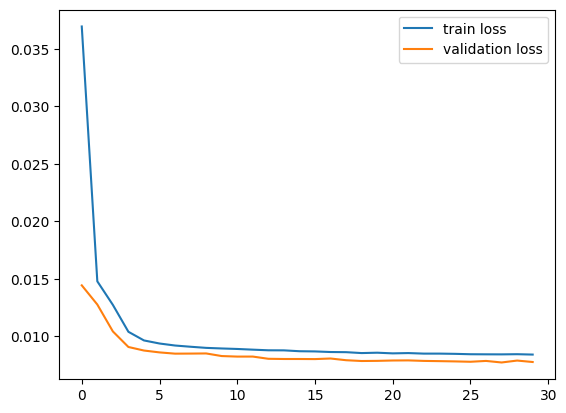

In [60]:
BATCH_SIZE=8

model = Sequential(name="6_LSTM13_Batch8")
model.add(Input((WINDOW, PARAMS_LENGTH), batch_size=BATCH_SIZE))
model.add(LSTM(PARAMS_LENGTH, return_sequences=False))
model.add(Dense(PARAMS_LENGTH, activation="linear"))
model.compile(optimizer="adam", loss="mse")
model.summary()
history = model.fit(X_train, y_train,
 epochs=30, validation_data=(X_val, y_val), batch_size=BATCH_SIZE, verbose=0)
show_results(X_test, y_test, model, history, batch_size=BATCH_SIZE)

Model: "6_LSTM13_Batch8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (4, 13)                   1404      
                                                                 
 dense_61 (Dense)            (4, 13)                   182       
                                                                 
Total params: 1,586
Trainable params: 1,586
Non-trainable params: 0
_________________________________________________________________


INFO:tensorflow:Assets written to: models_w2/6_LSTM13_Batch8\assets


INFO:tensorflow:Assets written to: models_w2/6_LSTM13_Batch8\assets


,Температура_dinam_fact,Лимфоциты#_dinam_fact,АСТ_dinam_fact,ЧСС_dinam_fact,ЧДД_dinam_fact,Билирубин общий_dinam_fact,MPV- Средн.объем тромбоцитов_dinam_fact,PCT- Тромбокрит_dinam_fact,Лимфоциты%_dinam_fact,снижение_сознания_dinam_fact,Cтепень тяжести по КТ_dinam_fact,Лактатдегидрогеназа_dinam_fact,PDW- Индекс расп.по объему тр._dinam_fact
MSE,0.001572,0.000142,0.000184,0.010989,0.000176,0.001630,0.004743,0.004437,0.008471,0.013269,0.055281,0.000399,0.005147
R2,-0.060920,-0.227437,0.562615,-0.028683,0.309300,-0.029694,0.635514,0.405322,0.440875,0.757271,-0.006571,0.371470,0.601925


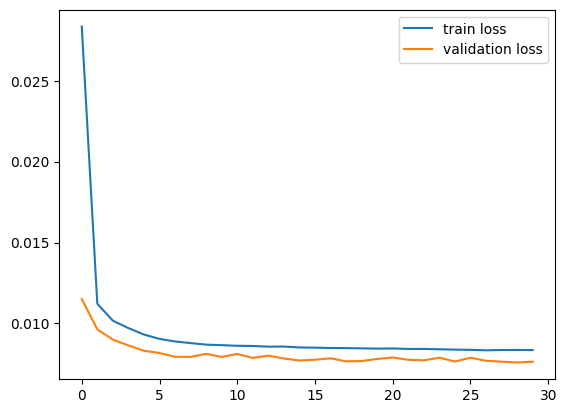

In [61]:
BATCH_SIZE=4

model = Sequential(name="6_LSTM13_Batch8")
model.add(Input((WINDOW, PARAMS_LENGTH), batch_size=BATCH_SIZE))
model.add(LSTM(PARAMS_LENGTH, return_sequences=False))
model.add(Dense(PARAMS_LENGTH, activation="linear"))
model.compile(optimizer="adam", loss="mse")
model.summary()
history = model.fit(X_train, y_train,
 epochs=30, validation_data=(X_val, y_val), batch_size=BATCH_SIZE, verbose=0)
show_results(X_test, y_test, model, history, batch_size=BATCH_SIZE)

Model: "6_LSTM13_Batch8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (2, 13)                   1404      
                                                                 
 dense_62 (Dense)            (2, 13)                   182       
                                                                 
Total params: 1,586
Trainable params: 1,586
Non-trainable params: 0
_________________________________________________________________


INFO:tensorflow:Assets written to: models_w2/6_LSTM13_Batch8\assets


INFO:tensorflow:Assets written to: models_w2/6_LSTM13_Batch8\assets


,Температура_dinam_fact,Лимфоциты#_dinam_fact,АСТ_dinam_fact,ЧСС_dinam_fact,ЧДД_dinam_fact,Билирубин общий_dinam_fact,MPV- Средн.объем тромбоцитов_dinam_fact,PCT- Тромбокрит_dinam_fact,Лимфоциты%_dinam_fact,снижение_сознания_dinam_fact,Cтепень тяжести по КТ_dinam_fact,Лактатдегидрогеназа_dinam_fact,PDW- Индекс расп.по объему тр._dinam_fact
MSE,0.001631,0.000109,0.000175,0.011025,0.000160,0.001833,0.004581,0.005720,0.008981,0.013263,0.055783,0.000358,0.005017
R2,-0.100233,0.053392,0.583860,-0.032083,0.374268,-0.157421,0.647976,0.233439,0.407251,0.757387,-0.015704,0.435977,0.612011


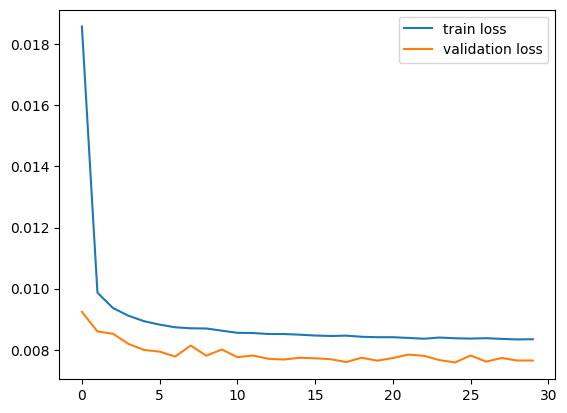

In [62]:
BATCH_SIZE=2

model = Sequential(name="6_LSTM13_Batch8")
model.add(Input((WINDOW, PARAMS_LENGTH), batch_size=BATCH_SIZE))
model.add(LSTM(PARAMS_LENGTH, return_sequences=False))
model.add(Dense(PARAMS_LENGTH, activation="linear"))
model.compile(optimizer="adam", loss="mse")
model.summary()
history = model.fit(X_train, y_train,
 epochs=30, validation_data=(X_val, y_val), batch_size=BATCH_SIZE, verbose=0)
show_results(X_test, y_test, model, history, batch_size=BATCH_SIZE)

### LSTM

LSTM 13 units and linear

Model: "LSTM13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_11 (LSTM)              (None, 13)                1404      
                                                                 
 dense_63 (Dense)            (None, 13)                182       
                                                                 
Total params: 1,586
Trainable params: 1,586
Non-trainable params: 0
_________________________________________________________________


INFO:tensorflow:Assets written to: models_w2/LSTM13\assets


INFO:tensorflow:Assets written to: models_w2/LSTM13\assets


,Температура_dinam_fact,Лимфоциты#_dinam_fact,АСТ_dinam_fact,ЧСС_dinam_fact,ЧДД_dinam_fact,Билирубин общий_dinam_fact,MPV- Средн.объем тромбоцитов_dinam_fact,PCT- Тромбокрит_dinam_fact,Лимфоциты%_dinam_fact,снижение_сознания_dinam_fact,Cтепень тяжести по КТ_dinam_fact,Лактатдегидрогеназа_dinam_fact,PDW- Индекс расп.по объему тр._dinam_fact
MSE,0.001839,0.000283,0.000323,0.011407,0.000310,0.001449,0.005775,0.005286,0.008728,0.013399,0.056919,0.000448,0.005727
R2,-0.240796,-1.449996,0.234453,-0.067832,-0.215583,0.084572,0.556219,0.291531,0.423932,0.754892,-0.036395,0.294112,0.557074


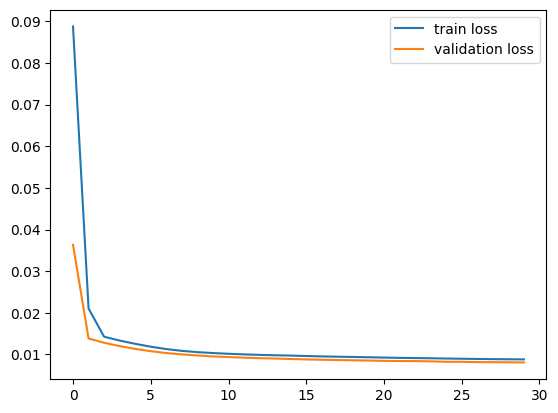

In [63]:
model = Sequential(name="LSTM13")
model.add(Input((WINDOW, PARAMS_LENGTH)))
model.add(LSTM(PARAMS_LENGTH, return_sequences=False))
model.add(Dense(PARAMS_LENGTH, activation="linear"))
model.compile(optimizer="adam", loss="mse")
model.summary()
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val), verbose=0)
show_results(X_test, y_test, model, history)

LSTMWithMore Units

Model: "LSTM32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 32)                5888      
                                                                 
 dense_64 (Dense)            (None, 13)                429       
                                                                 
Total params: 6,317
Trainable params: 6,317
Non-trainable params: 0
_________________________________________________________________


INFO:tensorflow:Assets written to: models_w2/LSTM32\assets


INFO:tensorflow:Assets written to: models_w2/LSTM32\assets


,Температура_dinam_fact,Лимфоциты#_dinam_fact,АСТ_dinam_fact,ЧСС_dinam_fact,ЧДД_dinam_fact,Билирубин общий_dinam_fact,MPV- Средн.объем тромбоцитов_dinam_fact,PCT- Тромбокрит_dinam_fact,Лимфоциты%_dinam_fact,снижение_сознания_dinam_fact,Cтепень тяжести по КТ_dinam_fact,Лактатдегидрогеназа_dinam_fact,PDW- Индекс расп.по объему тр._dinam_fact
MSE,0.001713,0.000131,0.000229,0.011265,0.000183,0.001632,0.005019,0.004743,0.008553,0.013133,0.057324,0.000403,0.005009
R2,-0.156122,-0.129131,0.456734,-0.054501,0.282491,-0.031011,0.614317,0.364316,0.435455,0.759759,-0.043769,0.364000,0.612584


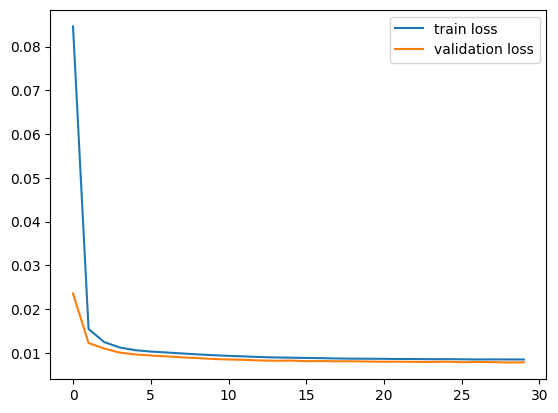

In [64]:
model = Sequential(name="LSTM32")
model.add(Input((WINDOW, PARAMS_LENGTH)))
model.add(LSTM(32, return_sequences=False))
model.add(Dense(PARAMS_LENGTH, activation="linear"))
model.compile(optimizer="adam", loss="mse")
model.summary()
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val), verbose=0)
show_results(X_test, y_test, model, history)

Model: "LSTM64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_13 (LSTM)              (None, 64)                19968     
                                                                 
 dense_65 (Dense)            (None, 13)                845       
                                                                 
Total params: 20,813
Trainable params: 20,813
Non-trainable params: 0
_________________________________________________________________


INFO:tensorflow:Assets written to: models_w2/LSTM64\assets


INFO:tensorflow:Assets written to: models_w2/LSTM64\assets


,Температура_dinam_fact,Лимфоциты#_dinam_fact,АСТ_dinam_fact,ЧСС_dinam_fact,ЧДД_dinam_fact,Билирубин общий_dinam_fact,MPV- Средн.объем тромбоцитов_dinam_fact,PCT- Тромбокрит_dinam_fact,Лимфоциты%_dinam_fact,снижение_сознания_dinam_fact,Cтепень тяжести по КТ_dinam_fact,Лактатдегидрогеназа_dinam_fact,PDW- Индекс расп.по объему тр._dinam_fact
MSE,0.001588,0.000066,0.000174,0.010869,0.000184,0.001786,0.00506,0.004518,0.008331,0.013319,0.055839,0.000349,0.005159
R2,-0.071353,0.432838,0.588317,-0.017413,0.277407,-0.127986,0.61113,0.394413,0.450104,0.756370,-0.016733,0.450015,0.601029


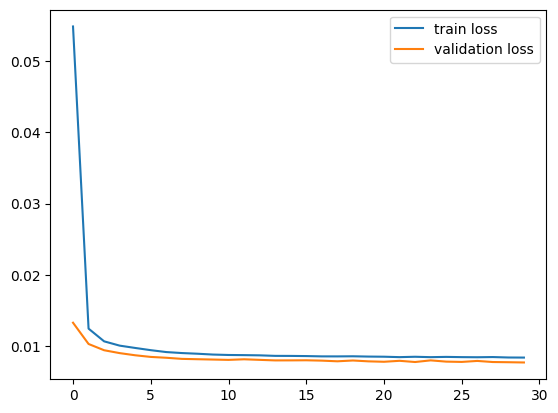

In [65]:
model = Sequential(name="LSTM64")
model.add(Input((WINDOW, PARAMS_LENGTH)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(PARAMS_LENGTH, activation="linear"))
model.compile(optimizer="adam", loss="mse")
model.summary()
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val), verbose=0)
show_results(X_test, y_test, model, history)

LSTM with batch

Model: "LSTM13_Batch8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (8, 13)                   1404      
                                                                 
 dense_66 (Dense)            (8, 13)                   182       
                                                                 
Total params: 1,586
Trainable params: 1,586
Non-trainable params: 0
_________________________________________________________________


INFO:tensorflow:Assets written to: models_w2/LSTM13_Batch8\assets


INFO:tensorflow:Assets written to: models_w2/LSTM13_Batch8\assets


,Температура_dinam_fact,Лимфоциты#_dinam_fact,АСТ_dinam_fact,ЧСС_dinam_fact,ЧДД_dinam_fact,Билирубин общий_dinam_fact,MPV- Средн.объем тромбоцитов_dinam_fact,PCT- Тромбокрит_dinam_fact,Лимфоциты%_dinam_fact,снижение_сознания_dinam_fact,Cтепень тяжести по КТ_dinam_fact,Лактатдегидрогеназа_dinam_fact,PDW- Индекс расп.по объему тр._dinam_fact
MSE,0.001659,0.000161,0.000157,0.011145,0.000175,0.001444,0.005283,0.004457,0.008704,0.013311,0.055366,0.00039,0.005211
R2,-0.119612,-0.390907,0.627050,-0.043327,0.313645,0.088224,0.594044,0.402640,0.425510,0.756509,-0.008121,0.38464,0.596993


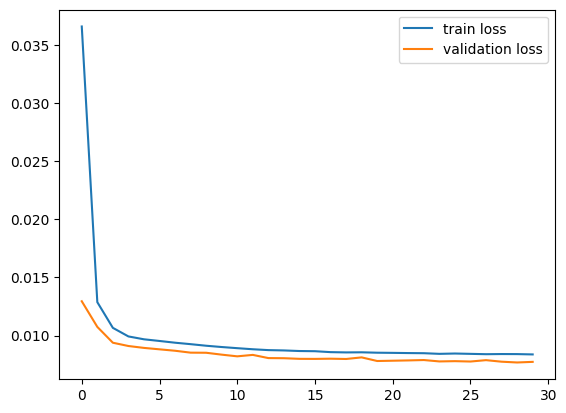

In [66]:
BATCH_SIZE=8

model = Sequential(name="LSTM13_Batch8")
model.add(Input((WINDOW, PARAMS_LENGTH), batch_size=BATCH_SIZE))
model.add(LSTM(PARAMS_LENGTH, return_sequences=False))
model.add(Dense(PARAMS_LENGTH, activation="linear"))
model.compile(optimizer="adam", loss="mse")
model.summary()
history = model.fit(X_train, y_train,
 epochs=30, validation_data=(X_val, y_val), batch_size=BATCH_SIZE, verbose=0)
show_results(X_test, y_test, model, history, batch_size=BATCH_SIZE)

Model: "LSTM13_Batch4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_15 (LSTM)              (4, 13)                   1404      
                                                                 
 dense_67 (Dense)            (4, 13)                   182       
                                                                 
Total params: 1,586
Trainable params: 1,586
Non-trainable params: 0
_________________________________________________________________


INFO:tensorflow:Assets written to: models_w2/LSTM13_Batch4\assets


INFO:tensorflow:Assets written to: models_w2/LSTM13_Batch4\assets


,Температура_dinam_fact,Лимфоциты#_dinam_fact,АСТ_dinam_fact,ЧСС_dinam_fact,ЧДД_dinam_fact,Билирубин общий_dinam_fact,MPV- Средн.объем тромбоцитов_dinam_fact,PCT- Тромбокрит_dinam_fact,Лимфоциты%_dinam_fact,снижение_сознания_dinam_fact,Cтепень тяжести по КТ_dinam_fact,Лактатдегидрогеназа_dinam_fact,PDW- Индекс расп.по объему тр._dinam_fact
MSE,0.001526,0.000115,0.000193,0.010956,0.000183,0.001794,0.004599,0.00435,0.008491,0.013368,0.055820,0.000406,0.005026
R2,-0.029610,0.003630,0.542185,-0.025551,0.281061,-0.132844,0.646541,0.41705,0.439567,0.755472,-0.016387,0.359159,0.611306


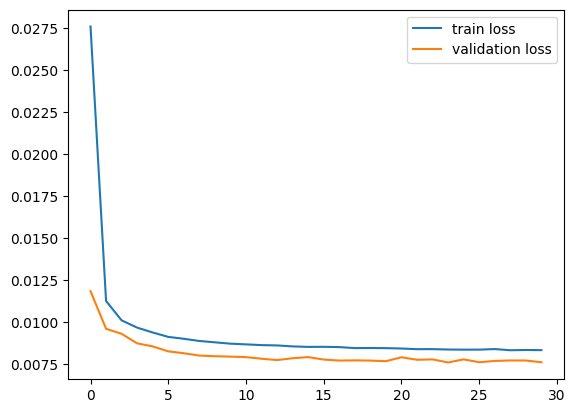

In [67]:
BATCH_SIZE=4
model = Sequential(name="LSTM13_Batch4")
model.add(Input((WINDOW, PARAMS_LENGTH), batch_size=BATCH_SIZE))
model.add(LSTM(PARAMS_LENGTH, return_sequences=False))
model.add(Dense(PARAMS_LENGTH, activation="linear"))
model.compile(optimizer="adam", loss="mse")
model.summary()
history = model.fit(X_train, y_train,
 epochs=30, validation_data=(X_val, y_val), batch_size=BATCH_SIZE, verbose=0)
show_results(X_test, y_test, model, history, batch_size=BATCH_SIZE)

Model: "LSTM13_Batch2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (2, 13)                   1404      
                                                                 
 dense_68 (Dense)            (2, 13)                   182       
                                                                 
Total params: 1,586
Trainable params: 1,586
Non-trainable params: 0
_________________________________________________________________


INFO:tensorflow:Assets written to: models_w2/LSTM13_Batch2\assets


INFO:tensorflow:Assets written to: models_w2/LSTM13_Batch2\assets


,Температура_dinam_fact,Лимфоциты#_dinam_fact,АСТ_dinam_fact,ЧСС_dinam_fact,ЧДД_dinam_fact,Билирубин общий_dinam_fact,MPV- Средн.объем тромбоцитов_dinam_fact,PCT- Тромбокрит_dinam_fact,Лимфоциты%_dinam_fact,снижение_сознания_dinam_fact,Cтепень тяжести по КТ_dinam_fact,Лактатдегидрогеназа_dinam_fact,PDW- Индекс расп.по объему тр._dinam_fact
MSE,0.001631,0.000077,0.000206,0.010955,0.000155,0.001682,0.004923,0.004280,0.008440,0.013187,0.055626,0.000439,0.005075
R2,-0.100765,0.334638,0.510444,-0.025522,0.392087,-0.062599,0.621657,0.426369,0.442951,0.758786,-0.012847,0.307291,0.607486


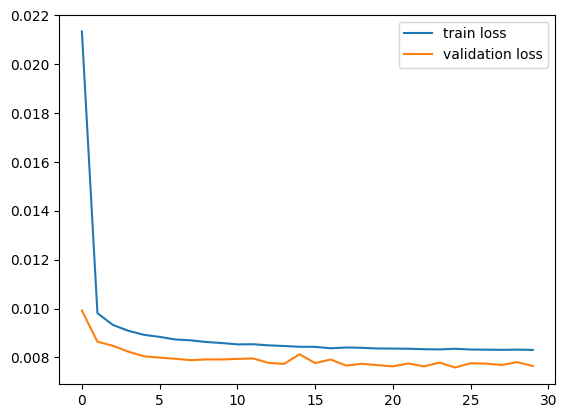

In [68]:
BATCH_SIZE=2
model = Sequential(name="LSTM13_Batch2")
model.add(Input((WINDOW, PARAMS_LENGTH), batch_size=BATCH_SIZE))
model.add(LSTM(PARAMS_LENGTH, return_sequences=False))
model.add(Dense(PARAMS_LENGTH, activation="linear"))
model.compile(optimizer="adam", loss="mse")
model.summary()
history = model.fit(X_train, y_train,
 epochs=30, validation_data=(X_val, y_val), batch_size=BATCH_SIZE, verbose=0)
show_results(X_test, y_test, model, history, batch_size=BATCH_SIZE)

Model: "LSTM13_Batch1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_17 (LSTM)              (1, 13)                   1404      
                                                                 
 dense_69 (Dense)            (1, 13)                   182       
                                                                 
Total params: 1,586
Trainable params: 1,586
Non-trainable params: 0
_________________________________________________________________


INFO:tensorflow:Assets written to: models_w2/LSTM13_Batch1\assets


INFO:tensorflow:Assets written to: models_w2/LSTM13_Batch1\assets


,Температура_dinam_fact,Лимфоциты#_dinam_fact,АСТ_dinam_fact,ЧСС_dinam_fact,ЧДД_dinam_fact,Билирубин общий_dinam_fact,MPV- Средн.объем тромбоцитов_dinam_fact,PCT- Тромбокрит_dinam_fact,Лимфоциты%_dinam_fact,снижение_сознания_dinam_fact,Cтепень тяжести по КТ_dinam_fact,Лактатдегидрогеназа_dinam_fact,PDW- Индекс расп.по объему тр._dinam_fact
MSE,0.001577,0.00015,0.000298,0.010955,0.000175,0.001630,0.005239,0.004223,0.009395,0.013124,0.059458,0.000469,0.005522
R2,-0.063757,-0.29882,0.293357,-0.025492,0.312637,-0.029257,0.597387,0.433956,0.379935,0.759934,-0.082624,0.260205,0.572939


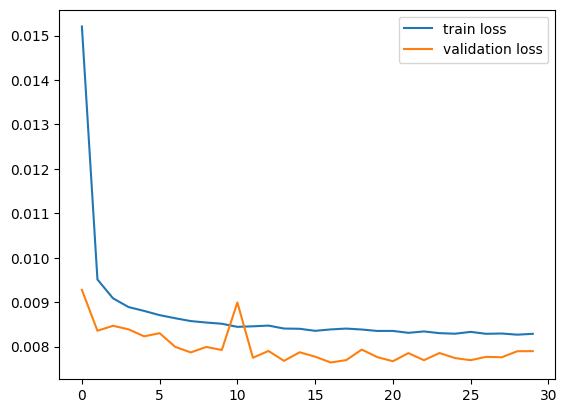

In [69]:
BATCH_SIZE=1
model = Sequential(name="LSTM13_Batch1")
model.add(Input((WINDOW, PARAMS_LENGTH), batch_size=BATCH_SIZE))
model.add(LSTM(PARAMS_LENGTH, return_sequences=False))
model.add(Dense(PARAMS_LENGTH, activation="linear"))
model.compile(optimizer="adam", loss="mse")
model.summary()
history = model.fit(X_train, y_train,
 epochs=30, validation_data=(X_val, y_val), batch_size=BATCH_SIZE, verbose=0)
show_results(X_test, y_test, model, history, batch_size=BATCH_SIZE)

LSTM to LSTM

Model: "LSTM64xLSTM13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 2, 32)             5888      
                                                                 
 lstm_19 (LSTM)              (None, 13)                2392      
                                                                 
 dense_70 (Dense)            (None, 13)                182       
                                                                 
Total params: 8,462
Trainable params: 8,462
Non-trainable params: 0
_________________________________________________________________
None


INFO:tensorflow:Assets written to: models_w2/LSTM64xLSTM13\assets


INFO:tensorflow:Assets written to: models_w2/LSTM64xLSTM13\assets


,Температура_dinam_fact,Лимфоциты#_dinam_fact,АСТ_dinam_fact,ЧСС_dinam_fact,ЧДД_dinam_fact,Билирубин общий_dinam_fact,MPV- Средн.объем тромбоцитов_dinam_fact,PCT- Тромбокрит_dinam_fact,Лимфоциты%_dinam_fact,снижение_сознания_dinam_fact,Cтепень тяжести по КТ_dinam_fact,Лактатдегидрогеназа_dinam_fact,PDW- Индекс расп.по объему тр._dinam_fact
MSE,0.001526,0.000247,0.000424,0.011178,0.000235,0.001430,0.005163,0.005639,0.009416,0.013120,0.055262,0.000416,0.005641
R2,-0.029841,-1.137382,-0.007082,-0.046353,0.077472,0.097012,0.603220,0.244173,0.378534,0.759995,-0.006229,0.343823,0.563715


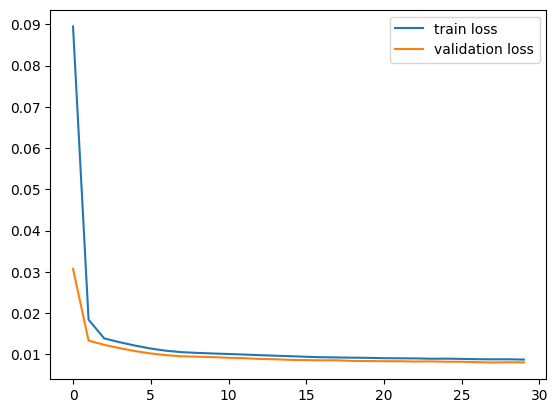

In [70]:
model = Sequential(name="LSTM64xLSTM13")
model.add(Input((WINDOW, PARAMS_LENGTH)))
model.add(LSTM(32, return_sequences=True))
model.add(LSTM(PARAMS_LENGTH, return_sequences=False))
model.add(Dense(PARAMS_LENGTH, activation="linear"))
model.compile(optimizer="adam", loss="mse")
print(model.summary())
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val), verbose=0)
show_results(X_test, y_test, model, history)

LSTM64xLSTM13_Batch4

Model: "LSTM64xLSTM13_Batch4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (4, 2, 32)                5888      
                                                                 
 lstm_21 (LSTM)              (4, 13)                   2392      
                                                                 
 dense_71 (Dense)            (4, 13)                   182       
                                                                 
Total params: 8,462
Trainable params: 8,462
Non-trainable params: 0
_________________________________________________________________
None


INFO:tensorflow:Assets written to: models_w2/LSTM64xLSTM13_Batch4\assets


INFO:tensorflow:Assets written to: models_w2/LSTM64xLSTM13_Batch4\assets


,Температура_dinam_fact,Лимфоциты#_dinam_fact,АСТ_dinam_fact,ЧСС_dinam_fact,ЧДД_dinam_fact,Билирубин общий_dinam_fact,MPV- Средн.объем тромбоцитов_dinam_fact,PCT- Тромбокрит_dinam_fact,Лимфоциты%_dinam_fact,снижение_сознания_dinam_fact,Cтепень тяжести по КТ_dinam_fact,Лактатдегидрогеназа_dinam_fact,PDW- Индекс расп.по объему тр._dinam_fact
MSE,0.001568,0.000125,0.000204,0.011139,0.000395,0.001442,0.004901,0.004220,0.008505,0.013114,0.055521,0.000406,0.005231
R2,-0.057656,-0.079557,0.515769,-0.042697,-0.550255,0.089506,0.623358,0.434401,0.438651,0.760120,-0.010934,0.360014,0.595423


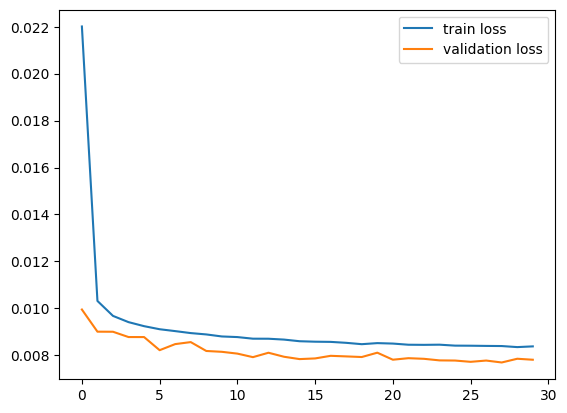

In [71]:
BATCH_SIZE=4
model = Sequential(name="LSTM64xLSTM13_Batch4")
model.add(Input((WINDOW, PARAMS_LENGTH), batch_size=BATCH_SIZE))
model.add(LSTM(32, return_sequences=True))
model.add(LSTM(PARAMS_LENGTH, return_sequences=False))
model.add(Dense(PARAMS_LENGTH, activation="linear"))
model.compile(optimizer="adam", loss="mse")
print(model.summary())
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val), batch_size=BATCH_SIZE, verbose=0)
show_results(X_test, y_test, model, history, batch_size=BATCH_SIZE)

Model: "LSTM64_LSTM32_Dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_22 (LSTM)              (None, 2, 64)             19968     
                                                                 
 lstm_23 (LSTM)              (None, 32)                12416     
                                                                 
 dense_72 (Dense)            (None, 13)                429       
                                                                 
Total params: 32,813
Trainable params: 32,813
Non-trainable params: 0
_________________________________________________________________
None


INFO:tensorflow:Assets written to: models_w2/LSTM64_LSTM32_Dense\assets


INFO:tensorflow:Assets written to: models_w2/LSTM64_LSTM32_Dense\assets


,Температура_dinam_fact,Лимфоциты#_dinam_fact,АСТ_dinam_fact,ЧСС_dinam_fact,ЧДД_dinam_fact,Билирубин общий_dinam_fact,MPV- Средн.объем тромбоцитов_dinam_fact,PCT- Тромбокрит_dinam_fact,Лимфоциты%_dinam_fact,снижение_сознания_dinam_fact,Cтепень тяжести по КТ_dinam_fact,Лактатдегидрогеназа_dinam_fact,PDW- Индекс расп.по объему тр._dinam_fact
MSE,0.001600,0.000148,0.000220,0.011087,0.000192,0.001336,0.005194,0.004738,0.008689,0.013907,0.056818,0.000465,0.005081
R2,-0.079256,-0.280103,0.477377,-0.037880,0.246953,0.156263,0.600844,0.365035,0.426521,0.745601,-0.034548,0.267552,0.607033


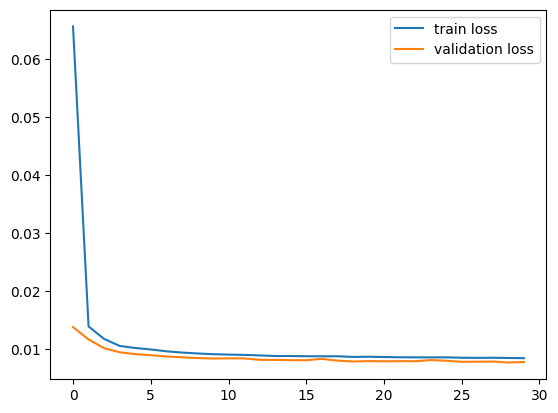

In [72]:
model = Sequential(name="LSTM64_LSTM32_Dense")
model.add(Input((WINDOW, PARAMS_LENGTH)))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(32, return_sequences=False))
model.add(Dense(PARAMS_LENGTH, activation="linear"))
model.compile(optimizer="adam", loss="mse")
print(model.summary())
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val), verbose=0)
show_results(X_test, y_test, model, history)

LSTM64xLSTM32_Batch4

Model: "LSTM64xLSTM32_Batch4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_24 (LSTM)              (4, 2, 64)                19968     
                                                                 
 lstm_25 (LSTM)              (4, 32)                   12416     
                                                                 
 dense_73 (Dense)            (4, 13)                   429       
                                                                 
Total params: 32,813
Trainable params: 32,813
Non-trainable params: 0
_________________________________________________________________
None


INFO:tensorflow:Assets written to: models_w2/LSTM64xLSTM32_Batch4\assets


INFO:tensorflow:Assets written to: models_w2/LSTM64xLSTM32_Batch4\assets


,Температура_dinam_fact,Лимфоциты#_dinam_fact,АСТ_dinam_fact,ЧСС_dinam_fact,ЧДД_dinam_fact,Билирубин общий_dinam_fact,MPV- Средн.объем тромбоцитов_dinam_fact,PCT- Тромбокрит_dinam_fact,Лимфоциты%_dinam_fact,снижение_сознания_dinam_fact,Cтепень тяжести по КТ_dinam_fact,Лактатдегидрогеназа_dinam_fact,PDW- Индекс расп.по объему тр._dinam_fact
MSE,0.001521,0.000079,0.000174,0.010668,0.000174,0.001658,0.004595,0.004045,0.008281,0.013307,0.055876,0.000358,0.004970
R2,-0.026058,0.312948,0.586762,0.001406,0.316796,-0.047391,0.646855,0.457869,0.453449,0.756585,-0.017394,0.435461,0.615617


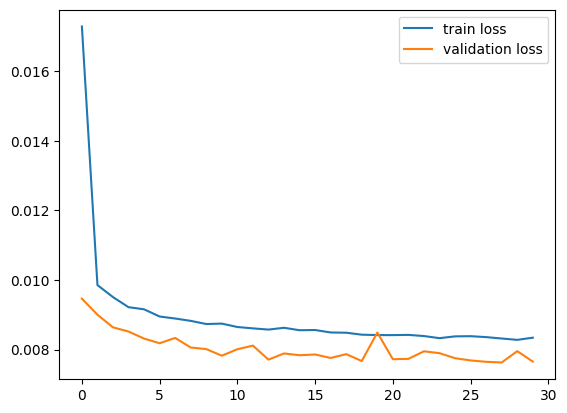

In [73]:
BATCH_SIZE=4
model = Sequential(name="LSTM64xLSTM32_Batch4")
model.add(Input((WINDOW, PARAMS_LENGTH), batch_size=BATCH_SIZE))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(32, return_sequences=False))
model.add(Dense(PARAMS_LENGTH, activation="linear"))
model.compile(optimizer="adam", loss="mse")
print(model.summary())
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val), batch_size=BATCH_SIZE, verbose=0)
show_results(X_test, y_test, model, history, batch_size=BATCH_SIZE)

#### GRU

Model: "GRU13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2 (GRU)                 (None, 13)                1092      
                                                                 
 dense_74 (Dense)            (None, 13)                182       
                                                                 
Total params: 1,274
Trainable params: 1,274
Non-trainable params: 0
_________________________________________________________________


INFO:tensorflow:Assets written to: models_w2/GRU13\assets


INFO:tensorflow:Assets written to: models_w2/GRU13\assets


,Температура_dinam_fact,Лимфоциты#_dinam_fact,АСТ_dinam_fact,ЧСС_dinam_fact,ЧДД_dinam_fact,Билирубин общий_dinam_fact,MPV- Средн.объем тромбоцитов_dinam_fact,PCT- Тромбокрит_dinam_fact,Лимфоциты%_dinam_fact,снижение_сознания_dinam_fact,Cтепень тяжести по КТ_dinam_fact,Лактатдегидрогеназа_dinam_fact,PDW- Индекс расп.по объему тр._dinam_fact
MSE,0.001871,0.000224,0.000400,0.011437,0.000277,0.001432,0.005355,0.005527,0.008769,0.013186,0.055522,0.000576,0.005656
R2,-0.262432,-0.937123,0.051941,-0.070631,-0.084421,0.095656,0.588444,0.259241,0.421222,0.758790,-0.010964,0.091790,0.562584


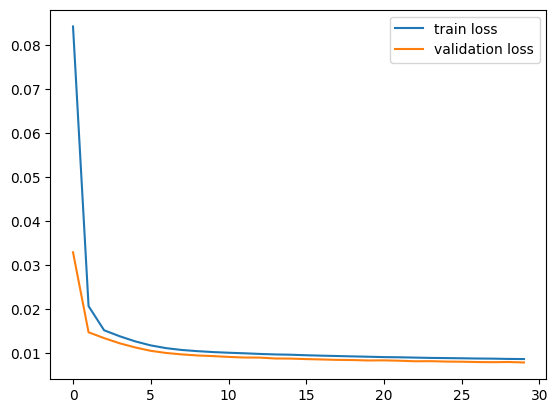

In [74]:
model = Sequential(name="GRU13")
model.add(Input((WINDOW, PARAMS_LENGTH)))
model.add(GRU(PARAMS_LENGTH, return_sequences=False))
model.add(Dense(PARAMS_LENGTH, activation="linear"))
model.compile(optimizer="adam", loss="mse")
model.summary()
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val), verbose=0)
show_results(X_test, y_test, model, history)

Model: "GRU13_Batch8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_3 (GRU)                 (8, 13)                   1092      
                                                                 
 dense_75 (Dense)            (8, 13)                   182       
                                                                 
Total params: 1,274
Trainable params: 1,274
Non-trainable params: 0
_________________________________________________________________


INFO:tensorflow:Assets written to: models_w2/GRU13_Batch8\assets


INFO:tensorflow:Assets written to: models_w2/GRU13_Batch8\assets


,Температура_dinam_fact,Лимфоциты#_dinam_fact,АСТ_dinam_fact,ЧСС_dinam_fact,ЧДД_dinam_fact,Билирубин общий_dinam_fact,MPV- Средн.объем тромбоцитов_dinam_fact,PCT- Тромбокрит_dinam_fact,Лимфоциты%_dinam_fact,снижение_сознания_dinam_fact,Cтепень тяжести по КТ_dinam_fact,Лактатдегидрогеназа_dinam_fact,PDW- Индекс расп.по объему тр._dinam_fact
MSE,0.001617,0.000092,0.000225,0.010963,0.000218,0.001361,0.004736,0.004477,0.008601,0.013296,0.056015,0.000358,0.005153
R2,-0.090835,0.202587,0.467038,-0.026248,0.146518,0.140598,0.636009,0.399939,0.432298,0.756786,-0.019935,0.435570,0.601507


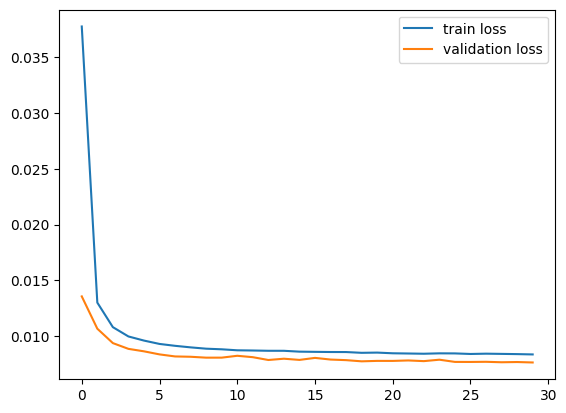

In [75]:
BATCH_SIZE = 8
model = Sequential(name="GRU13_Batch8")
model.add(Input((WINDOW, PARAMS_LENGTH), batch_size=BATCH_SIZE))
model.add(GRU(PARAMS_LENGTH, return_sequences=False))
model.add(Dense(PARAMS_LENGTH, activation="linear"))
model.compile(optimizer="adam", loss="mse")
model.summary()
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val), verbose=0, batch_size=BATCH_SIZE)
show_results(X_test, y_test, model, history , batch_size=BATCH_SIZE)

Model: "GRU13_Batch4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_4 (GRU)                 (4, 13)                   1092      
                                                                 
 dense_76 (Dense)            (4, 13)                   182       
                                                                 
Total params: 1,274
Trainable params: 1,274
Non-trainable params: 0
_________________________________________________________________


INFO:tensorflow:Assets written to: models_w2/GRU13_Batch4\assets


INFO:tensorflow:Assets written to: models_w2/GRU13_Batch4\assets


,Температура_dinam_fact,Лимфоциты#_dinam_fact,АСТ_dinam_fact,ЧСС_dinam_fact,ЧДД_dinam_fact,Билирубин общий_dinam_fact,MPV- Средн.объем тромбоцитов_dinam_fact,PCT- Тромбокрит_dinam_fact,Лимфоциты%_dinam_fact,снижение_сознания_dinam_fact,Cтепень тяжести по КТ_dinam_fact,Лактатдегидрогеназа_dinam_fact,PDW- Индекс расп.по объему тр._dinam_fact
MSE,0.001694,0.000105,0.000241,0.010718,0.000162,0.001927,0.004663,0.004353,0.008631,0.013321,0.055402,0.000401,0.005496
R2,-0.143159,0.093168,0.428257,-0.003283,0.363181,-0.216959,0.641636,0.416631,0.430338,0.756321,-0.008768,0.367211,0.574922


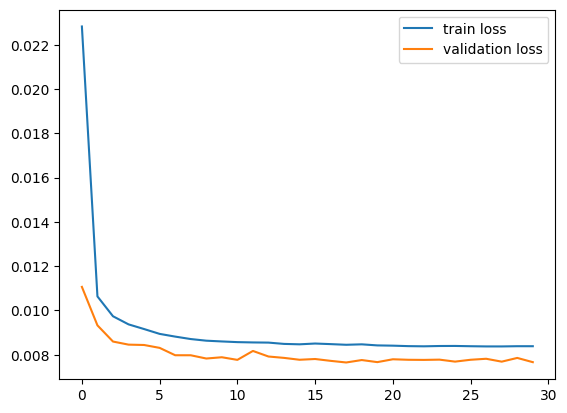

In [76]:
BATCH_SIZE = 4
model = Sequential(name="GRU13_Batch4")
model.add(Input((WINDOW, PARAMS_LENGTH), batch_size=BATCH_SIZE))
model.add(GRU(PARAMS_LENGTH, return_sequences=False))
model.add(Dense(PARAMS_LENGTH, activation="linear"))
model.compile(optimizer="adam", loss="mse")
model.summary()
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val), verbose=0, batch_size=BATCH_SIZE)
show_results(X_test, y_test, model, history , batch_size=BATCH_SIZE)

Model: "GRU13_Batch2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_5 (GRU)                 (2, 13)                   1092      
                                                                 
 dense_77 (Dense)            (2, 13)                   182       
                                                                 
Total params: 1,274
Trainable params: 1,274
Non-trainable params: 0
_________________________________________________________________


INFO:tensorflow:Assets written to: models_w2/GRU13_Batch2\assets


INFO:tensorflow:Assets written to: models_w2/GRU13_Batch2\assets


,Температура_dinam_fact,Лимфоциты#_dinam_fact,АСТ_dinam_fact,ЧСС_dinam_fact,ЧДД_dinam_fact,Билирубин общий_dinam_fact,MPV- Средн.объем тромбоцитов_dinam_fact,PCT- Тромбокрит_dinam_fact,Лимфоциты%_dinam_fact,снижение_сознания_dinam_fact,Cтепень тяжести по КТ_dinam_fact,Лактатдегидрогеназа_dinam_fact,PDW- Индекс расп.по объему тр._dinam_fact
MSE,0.001650,0.000093,0.001032,0.010885,0.000334,0.001950,0.004685,0.004564,0.008470,0.013300,0.055516,0.001528,0.005088
R2,-0.113127,0.193976,-1.447290,-0.018912,-0.308173,-0.231517,0.639926,0.388333,0.440939,0.756718,-0.010840,-1.408281,0.606479


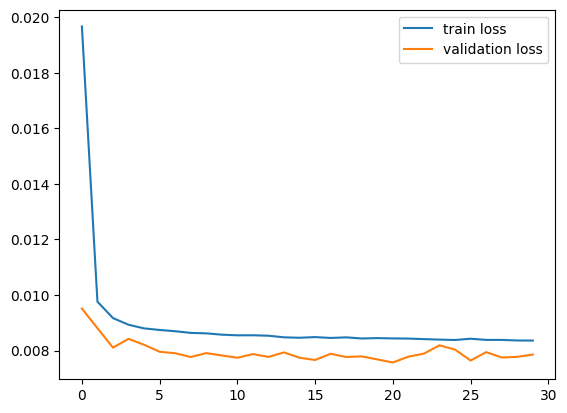

In [77]:
BATCH_SIZE = 2
model = Sequential(name="GRU13_Batch2")
model.add(Input((WINDOW, PARAMS_LENGTH), batch_size=BATCH_SIZE))
model.add(GRU(PARAMS_LENGTH, return_sequences=False))
model.add(Dense(PARAMS_LENGTH, activation="linear"))
model.compile(optimizer="adam", loss="mse")
model.summary()
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val), verbose=0, batch_size=BATCH_SIZE)
show_results(X_test, y_test, model, history , batch_size=BATCH_SIZE)

Model: "GRU64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_6 (GRU)                 (None, 64)                15168     
                                                                 
 dense_78 (Dense)            (None, 13)                845       
                                                                 
Total params: 16,013
Trainable params: 16,013
Non-trainable params: 0
_________________________________________________________________


INFO:tensorflow:Assets written to: models_w2/GRU64\assets


INFO:tensorflow:Assets written to: models_w2/GRU64\assets


,Температура_dinam_fact,Лимфоциты#_dinam_fact,АСТ_dinam_fact,ЧСС_dinam_fact,ЧДД_dinam_fact,Билирубин общий_dinam_fact,MPV- Средн.объем тромбоцитов_dinam_fact,PCT- Тромбокрит_dinam_fact,Лимфоциты%_dinam_fact,снижение_сознания_dinam_fact,Cтепень тяжести по КТ_dinam_fact,Лактатдегидрогеназа_dinam_fact,PDW- Индекс расп.по объему тр._dinam_fact
MSE,0.001569,0.000068,0.000203,0.011132,0.000168,0.001993,0.004911,0.004300,0.008427,0.013055,0.055574,0.000457,0.004974
R2,-0.058533,0.410098,0.519297,-0.042059,0.342578,-0.258816,0.622632,0.423639,0.443793,0.761193,-0.011909,0.279280,0.615354


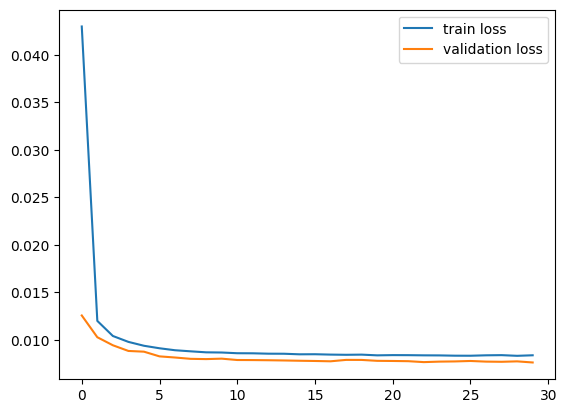

In [78]:
model = Sequential(name="GRU64")
model.add(Input((WINDOW, PARAMS_LENGTH)))
model.add(GRU(64, return_sequences=False))
model.add(Dense(PARAMS_LENGTH, activation="linear"))
model.compile(optimizer="adam", loss="mse")
model.summary()
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val), verbose=0)
show_results(X_test, y_test, model, history)

Model: "GRU64_Batch4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_7 (GRU)                 (4, 64)                   15168     
                                                                 
 dense_79 (Dense)            (4, 13)                   845       
                                                                 
Total params: 16,013
Trainable params: 16,013
Non-trainable params: 0
_________________________________________________________________


INFO:tensorflow:Assets written to: models_w2/GRU64_Batch4\assets


INFO:tensorflow:Assets written to: models_w2/GRU64_Batch4\assets


,Температура_dinam_fact,Лимфоциты#_dinam_fact,АСТ_dinam_fact,ЧСС_dinam_fact,ЧДД_dinam_fact,Билирубин общий_dinam_fact,MPV- Средн.объем тромбоцитов_dinam_fact,PCT- Тромбокрит_dinam_fact,Лимфоциты%_dinam_fact,снижение_сознания_dinam_fact,Cтепень тяжести по КТ_dinam_fact,Лактатдегидрогеназа_dinam_fact,PDW- Индекс расп.по объему тр._dinam_fact
MSE,0.001529,0.000065,0.000216,0.011173,0.000170,0.001952,0.004670,0.005041,0.008438,0.013251,0.055619,0.000396,0.005016
R2,-0.031746,0.438563,0.487862,-0.045907,0.334358,-0.232841,0.641137,0.324448,0.443070,0.757614,-0.012720,0.375658,0.612057


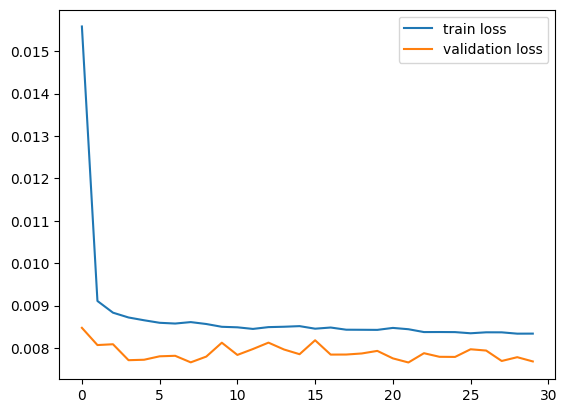

In [79]:
BATCH_SIZE = 4
model = Sequential(name="GRU64_Batch4")
model.add(Input((WINDOW, PARAMS_LENGTH), batch_size=BATCH_SIZE))
model.add(GRU(64, return_sequences=False))
model.add(Dense(PARAMS_LENGTH, activation="linear"))
model.compile(optimizer="adam", loss="mse")
model.summary()
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val), verbose=0, batch_size=BATCH_SIZE)
show_results(X_test, y_test, model, history , batch_size=BATCH_SIZE)

Model: "GRU64_GRU13_Dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_8 (GRU)                 (None, 2, 64)             15168     
                                                                 
 gru_9 (GRU)                 (None, 13)                3081      
                                                                 
 dense_80 (Dense)            (None, 13)                182       
                                                                 
Total params: 18,431
Trainable params: 18,431
Non-trainable params: 0
_________________________________________________________________
None


INFO:tensorflow:Assets written to: models_w2/GRU64_GRU13_Dense\assets


INFO:tensorflow:Assets written to: models_w2/GRU64_GRU13_Dense\assets


,Температура_dinam_fact,Лимфоциты#_dinam_fact,АСТ_dinam_fact,ЧСС_dinam_fact,ЧДД_dinam_fact,Билирубин общий_dinam_fact,MPV- Средн.объем тромбоцитов_dinam_fact,PCT- Тромбокрит_dinam_fact,Лимфоциты%_dinam_fact,снижение_сознания_dinam_fact,Cтепень тяжести по КТ_dinam_fact,Лактатдегидрогеназа_dinam_fact,PDW- Индекс расп.по объему тр._dinam_fact
MSE,0.001523,0.000146,0.000334,0.011039,0.000197,0.001538,0.004933,0.004890,0.009115,0.013417,0.055518,0.000361,0.004995
R2,-0.027831,-0.262829,0.208532,-0.033317,0.229072,0.028363,0.620928,0.344581,0.398398,0.754564,-0.010882,0.431431,0.613731


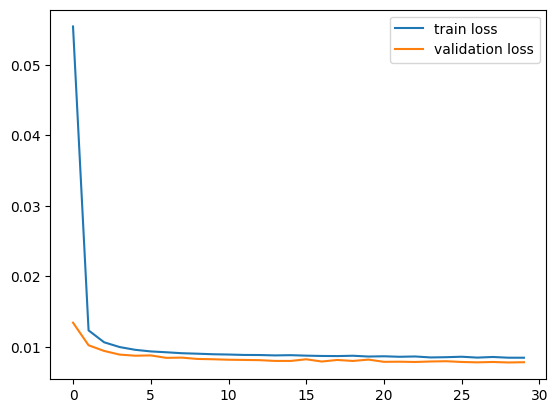

In [80]:
model = Sequential(name="GRU64_GRU13_Dense")
model.add(Input((WINDOW, PARAMS_LENGTH)))
model.add(GRU(64, return_sequences=True))
model.add(GRU(PARAMS_LENGTH, return_sequences=False))
model.add(Dense(PARAMS_LENGTH, activation="linear"))
model.compile(optimizer="adam", loss="mse")
print(model.summary())
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val), verbose=0)
show_results(X_test, y_test, model, history)

Model: "GRU64_GRU32_Dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_10 (GRU)                (None, 2, 64)             15168     
                                                                 
 gru_11 (GRU)                (None, 32)                9408      
                                                                 
 dense_81 (Dense)            (None, 13)                429       
                                                                 
Total params: 25,005
Trainable params: 25,005
Non-trainable params: 0
_________________________________________________________________
None


INFO:tensorflow:Assets written to: models_w2/GRU64_GRU32_Dense\assets


INFO:tensorflow:Assets written to: models_w2/GRU64_GRU32_Dense\assets


,Температура_dinam_fact,Лимфоциты#_dinam_fact,АСТ_dinam_fact,ЧСС_dinam_fact,ЧДД_dinam_fact,Билирубин общий_dinam_fact,MPV- Средн.объем тромбоцитов_dinam_fact,PCT- Тромбокрит_dinam_fact,Лимфоциты%_dinam_fact,снижение_сознания_dinam_fact,Cтепень тяжести по КТ_dinam_fact,Лактатдегидрогеназа_dinam_fact,PDW- Индекс расп.по объему тр._dinam_fact
MSE,0.001578,0.000086,0.000167,0.011033,0.000336,0.001584,0.004649,0.004368,0.008613,0.013503,0.055992,0.000422,0.005183
R2,-0.064746,0.252632,0.604499,-0.032833,-0.317105,-0.000666,0.642709,0.414600,0.431493,0.752996,-0.019510,0.335197,0.599165


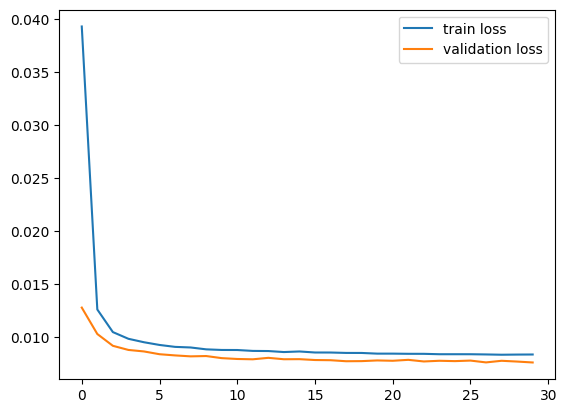

In [81]:
model = Sequential(name="GRU64_GRU32_Dense")
model.add(Input((WINDOW, PARAMS_LENGTH)))
model.add(GRU(64, return_sequences=True))
model.add(GRU(32, return_sequences=False))
model.add(Dense(PARAMS_LENGTH, activation="linear"))
model.compile(optimizer="adam", loss="mse")
print(model.summary())
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val), verbose=0)
show_results(X_test, y_test, model, history)

Model: "GRU32xGRU32_Batch4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_12 (GRU)                (4, 2, 32)                4512      
                                                                 
 gru_13 (GRU)                (4, 32)                   6336      
                                                                 
 dense_82 (Dense)            (4, 13)                   429       
                                                                 
Total params: 11,277
Trainable params: 11,277
Non-trainable params: 0
_________________________________________________________________
None


INFO:tensorflow:Assets written to: models_w2/GRU32xGRU32_Batch4\assets


INFO:tensorflow:Assets written to: models_w2/GRU32xGRU32_Batch4\assets


,Температура_dinam_fact,Лимфоциты#_dinam_fact,АСТ_dinam_fact,ЧСС_dinam_fact,ЧДД_dinam_fact,Билирубин общий_dinam_fact,MPV- Средн.объем тромбоцитов_dinam_fact,PCT- Тромбокрит_dinam_fact,Лимфоциты%_dinam_fact,снижение_сознания_dinam_fact,Cтепень тяжести по КТ_dinam_fact,Лактатдегидрогеназа_dinam_fact,PDW- Индекс расп.по объему тр._dinam_fact
MSE,0.001550,0.000434,0.000171,0.010977,0.000156,0.001678,0.004539,0.004105,0.008831,0.013174,0.055960,0.000375,0.005095
R2,-0.045923,-2.749460,0.595024,-0.027583,0.390174,-0.059511,0.651195,0.449788,0.417105,0.759017,-0.018922,0.408160,0.605970


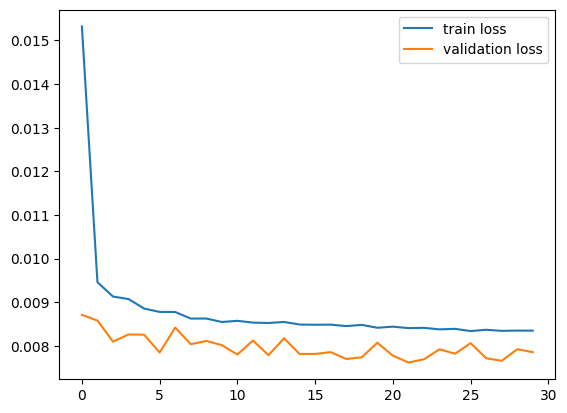

In [82]:
BATCH_SIZE=4
model = Sequential(name="GRU32xGRU32_Batch4")
model.add(Input((WINDOW, PARAMS_LENGTH), batch_size=BATCH_SIZE))
model.add(GRU(32, return_sequences=True))
model.add(GRU(32, return_sequences=False))
model.add(Dense(PARAMS_LENGTH, activation="linear"))
model.compile(optimizer="adam", loss="mse")
print(model.summary())
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val), batch_size=BATCH_SIZE, verbose=0)
show_results(X_test, y_test, model, history, batch_size=BATCH_SIZE)

## Train with static parameters


Lets define new function for splitting

In [83]:
(X_train, y_train), (X_test, y_test), (X_val, y_val) = \
datacovid.prepare_data_with_static(df_input=df, window=2)
(X_train, y_train), (X_test, y_test), (X_val, y_val) =\
    (X_train[5:], y_train[5:]), (X_test[2:], y_test[2:]), (X_val[2:], y_val[2:])
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape), (X_val.shape, y_val.shape)

(((1800, 2, 47), (1800, 13)),
 ((224, 2, 47), (224, 13)),
 ((224, 2, 47), (224, 13)))

#### FNN

Flatten3Layers_Mixed

Model: "Flatten3Layers_Mixed"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_11 (Flatten)        (None, 94)                0         
                                                                 
 dense_83 (Dense)            (None, 94)                8930      
                                                                 
 dense_84 (Dense)            (None, 47)                4465      
                                                                 
 dense_85 (Dense)            (None, 47)                2256      
                                                                 
 dense_86 (Dense)            (None, 13)                624       
                                                                 
Total params: 16,275
Trainable params: 16,275
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
57/57 [========================

INFO:tensorflow:Assets written to: models_w2/Flatten3Layers_Mixed\assets


,Температура_dinam_fact,Лимфоциты#_dinam_fact,АСТ_dinam_fact,ЧСС_dinam_fact,ЧДД_dinam_fact,Билирубин общий_dinam_fact,MPV- Средн.объем тромбоцитов_dinam_fact,PCT- Тромбокрит_dinam_fact,Лимфоциты%_dinam_fact,снижение_сознания_dinam_fact,Cтепень тяжести по КТ_dinam_fact,Лактатдегидрогеназа_dinam_fact,PDW- Индекс расп.по объему тр._dinam_fact
MSE,0.001900,0.000618,0.000331,0.007670,0.000314,0.001296,0.008461,0.008024,0.010744,0.014787,0.060398,0.000594,0.006072
R2,-0.289751,-18.547484,-0.081369,0.012508,-0.270599,0.060651,0.424120,0.211812,0.384191,0.789162,-0.095096,-0.108671,0.535222


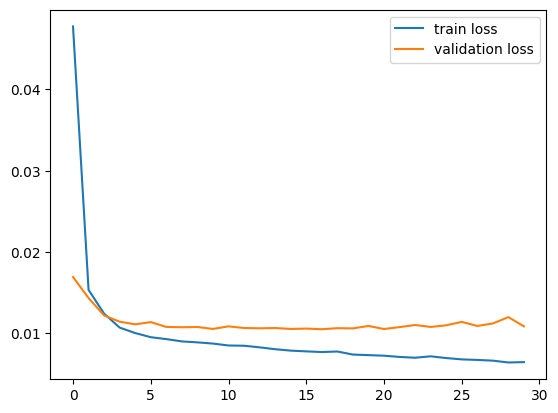

In [84]:
PARAMS_LENGTH=X_train.shape[2]
TARGET_LENGTH=y_train.shape[1]
model = Sequential(name="Flatten3Layers_Mixed")
model.add(Input((WINDOW, PARAMS_LENGTH)))
model.add(Flatten())
model.add(Dense(WINDOW*PARAMS_LENGTH, activation="relu"))
model.add(Dense(PARAMS_LENGTH, activation="relu"))
model.add(Dense(PARAMS_LENGTH, activation="relu"))
model.add(Dense(TARGET_LENGTH, activation="linear"))
model.compile(optimizer="adam", loss="mse")
model.summary()
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val))
show_results(X_test, y_test, model, history)

#### RNN

RNN32Mixed

RNN - all info in the vectors

Model: "RNNMixed"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_4 (SimpleRNN)    (None, 60)                6480      
                                                                 
 dense_87 (Dense)            (None, 13)                793       
                                                                 
Total params: 7,273
Trainable params: 7,273
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
57/57 [==============================] - 1s 4ms/step - loss: 0.0951 - val_loss: 0.0352
Epoch 2/30
57/57 [==============================] - 0s 2ms/step - loss: 0.0267 - val_loss: 0.0225
Epoch 3/30
57/57 [==============================] - 0s 2ms/step - loss: 0.0186 - val_loss: 0.0174
Epoch 4/30
57/57 [==============================] - 0s 2ms/step - loss: 0.0154 - val_loss: 0.0154
Epoch 5/30
57/57 [==============================] - 0s 2ms/s

INFO:tensorflow:Assets written to: models_w2/RNNMixed\assets


,Температура_dinam_fact,Лимфоциты#_dinam_fact,АСТ_dinam_fact,ЧСС_dinam_fact,ЧДД_dinam_fact,Билирубин общий_dinam_fact,MPV- Средн.объем тромбоцитов_dinam_fact,PCT- Тромбокрит_dinam_fact,Лимфоциты%_dinam_fact,снижение_сознания_dinam_fact,Cтепень тяжести по КТ_dinam_fact,Лактатдегидрогеназа_dinam_fact,PDW- Индекс расп.по объему тр._dinam_fact
MSE,0.002179,0.000641,0.000695,0.007378,0.000589,0.001450,0.007612,0.007186,0.010041,0.016129,0.055540,0.000928,0.005082
R2,-0.479548,-19.273460,-1.269253,0.050058,-1.383359,-0.051424,0.481868,0.294148,0.424445,0.770027,-0.007023,-0.730820,0.611035


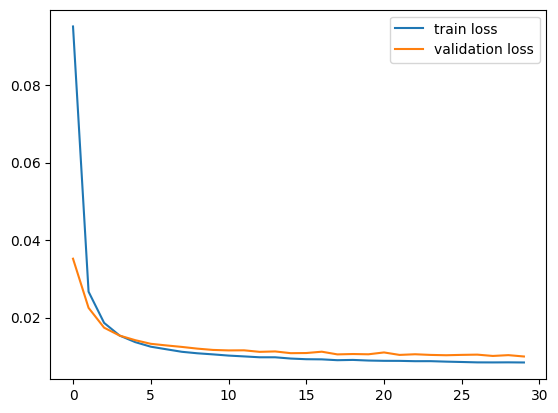

In [85]:
RNN_LENGTH = PARAMS_LENGTH+TARGET_LENGTH
model = Sequential(name="RNNMixed")
model.add(Input((WINDOW, PARAMS_LENGTH)))
model.add(SimpleRNN(RNN_LENGTH, return_sequences=False))
model.add(Dense(TARGET_LENGTH, activation="linear"))
model_lstm = model
model_lstm.compile(optimizer="adam", loss="mse")
model_lstm.summary()
history = model_lstm.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val))
show_results(X_test, y_test, model_lstm, history)

LSTM64Mixed

Model: "LSTM64Mixed"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_26 (LSTM)              (None, 64)                28672     
                                                                 
 dense_88 (Dense)            (None, 13)                845       
                                                                 
Total params: 29,517
Trainable params: 29,517
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
57/57 [==============================] - 2s 9ms/step - loss: 0.0345 - val_loss: 0.0164
Epoch 2/30
57/57 [==============================] - 0s 3ms/step - loss: 0.0140 - val_loss: 0.0132
Epoch 3/30
57/57 [==============================] - 0s 3ms/step - loss: 0.0117 - val_loss: 0.0118
Epoch 4/30
57/57 [==============================] - 0s 4ms/step - loss: 0.0103 - val_loss: 0.0111
Epoch 5/30
57/57 [==============================] - 0s 

INFO:tensorflow:Assets written to: models_w2/LSTM64Mixed\assets


INFO:tensorflow:Assets written to: models_w2/LSTM64Mixed\assets


,Температура_dinam_fact,Лимфоциты#_dinam_fact,АСТ_dinam_fact,ЧСС_dinam_fact,ЧДД_dinam_fact,Билирубин общий_dinam_fact,MPV- Средн.объем тромбоцитов_dinam_fact,PCT- Тромбокрит_dinam_fact,Лимфоциты%_dinam_fact,снижение_сознания_dinam_fact,Cтепень тяжести по КТ_dinam_fact,Лактатдегидрогеназа_dinam_fact,PDW- Индекс расп.по объему тр._dinam_fact
MSE,0.001849,0.000231,0.000234,0.007792,0.000218,0.000881,0.007813,0.006805,0.009208,0.013572,0.057643,0.000478,0.004444
R2,-0.255314,-6.315638,0.236495,-0.003220,0.119039,0.361337,0.468186,0.331532,0.472222,0.806481,-0.045153,0.108262,0.659814


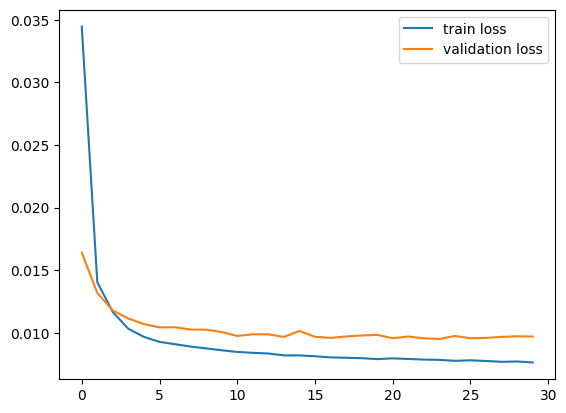

In [86]:
PARAMS_LENGTH = X_train.shape[2]
TARGET_LENGTH = y_train.shape[1]
model = Sequential(name="LSTM64Mixed")
model.add(Input((WINDOW, PARAMS_LENGTH)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(TARGET_LENGTH, activation="linear"))
model_lstm = model
model_lstm.compile(optimizer="adam", loss="mse")
model_lstm.summary()
history = model_lstm.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val))
show_results(X_test, y_test, model_lstm, history)

Model: "LSTM60Mixed"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_27 (LSTM)              (None, 60)                25920     
                                                                 
 dense_89 (Dense)            (None, 13)                793       
                                                                 
Total params: 26,713
Trainable params: 26,713
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
57/57 [==============================] - 2s 8ms/step - loss: 0.0485 - val_loss: 0.0174
Epoch 2/30
57/57 [==============================] - 0s 3ms/step - loss: 0.0153 - val_loss: 0.0136
Epoch 3/30
57/57 [==============================] - 0s 4ms/step - loss: 0.0124 - val_loss: 0.0121
Epoch 4/30
57/57 [==============================] - 0s 3ms/step - loss: 0.0109 - val_loss: 0.0112
Epoch 5/30
57/57 [==============================] - 0s 

INFO:tensorflow:Assets written to: models_w2/LSTM60Mixed\assets


INFO:tensorflow:Assets written to: models_w2/LSTM60Mixed\assets


,Температура_dinam_fact,Лимфоциты#_dinam_fact,АСТ_dinam_fact,ЧСС_dinam_fact,ЧДД_dinam_fact,Билирубин общий_dinam_fact,MPV- Средн.объем тромбоцитов_dinam_fact,PCT- Тромбокрит_dinam_fact,Лимфоциты%_dinam_fact,снижение_сознания_dinam_fact,Cтепень тяжести по КТ_dinam_fact,Лактатдегидрогеназа_dinam_fact,PDW- Индекс расп.по объему тр._dinam_fact
MSE,0.001834,0.000269,0.000330,0.008011,0.000212,0.000916,0.007359,0.006738,0.009272,0.013398,0.057520,0.000477,0.004564
R2,-0.245301,-7.513093,-0.076871,-0.031438,0.144423,0.335770,0.499087,0.338192,0.468548,0.808963,-0.042909,0.110893,0.650687


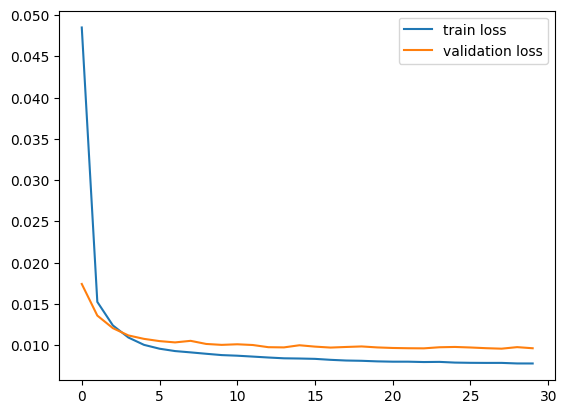

In [87]:
PARAMS_LENGTH = X_train.shape[2]
TARGET_LENGTH = y_train.shape[1]
model = Sequential(name=f"LSTM{RNN_LENGTH}Mixed")
model.add(Input((WINDOW, PARAMS_LENGTH)))
model.add(LSTM(RNN_LENGTH, return_sequences=False))
model.add(Dense(TARGET_LENGTH, activation="linear"))
model_lstm = model
model_lstm.compile(optimizer="adam", loss="mse")
model_lstm.summary()
history = model_lstm.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val))
show_results(X_test, y_test, model_lstm, history)

LSTMtoLSTM_Mixed

Model: "LSTMtoLSTM_Mixed"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_28 (LSTM)              (None, 2, 64)             28672     
                                                                 
 lstm_29 (LSTM)              (None, 64)                33024     
                                                                 
 dense_90 (Dense)            (None, 13)                845       
                                                                 
Total params: 62,541
Trainable params: 62,541
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
57/57 [==============================] - 3s 15ms/step - loss: 0.0407 - val_loss: 0.0156
Epoch 2/30
57/57 [==============================] - 0s 5ms/step - loss: 0.0139 - val_loss: 0.0126
Epoch 3/30
57/57 [==============================] - 0s 5ms/step - loss: 0.0112 - val_loss: 0.0111
Epoch 4/30
57/5

INFO:tensorflow:Assets written to: models_w2/LSTMtoLSTM_Mixed\assets


INFO:tensorflow:Assets written to: models_w2/LSTMtoLSTM_Mixed\assets


,Температура_dinam_fact,Лимфоциты#_dinam_fact,АСТ_dinam_fact,ЧСС_dinam_fact,ЧДД_dinam_fact,Билирубин общий_dinam_fact,MPV- Средн.объем тромбоцитов_dinam_fact,PCT- Тромбокрит_dinam_fact,Лимфоциты%_dinam_fact,снижение_сознания_dinam_fact,Cтепень тяжести по КТ_dinam_fact,Лактатдегидрогеназа_dinam_fact,PDW- Индекс расп.по объему тр._dinam_fact
MSE,0.001639,0.000575,0.000315,0.007466,0.000145,0.001131,0.007532,0.007772,0.008817,0.014466,0.057966,0.000438,0.004978
R2,-0.112871,-17.179848,-0.028394,0.038798,0.413600,0.180338,0.487322,0.236577,0.494616,0.793742,-0.050999,0.182278,0.618958


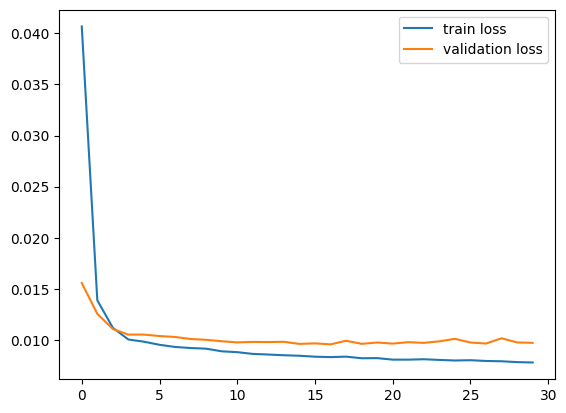

In [88]:
PARAMS_LENGTH = X_train.shape[2]
TARGET_LENGTH = y_train.shape[1]
model = Sequential(name="LSTMtoLSTM_Mixed")
model.add(Input((WINDOW, PARAMS_LENGTH)))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(TARGET_LENGTH, activation="linear"))
model_lstm = model
model_lstm.compile(optimizer="adam", loss="mse")
model_lstm.summary()
history = model_lstm.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val))
show_results(X_test, y_test, model_lstm, history)

Model: "LSTMtoLSTM_Mixed_batch4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_30 (LSTM)              (4, 2, 64)                28672     
                                                                 
 lstm_31 (LSTM)              (4, 64)                   33024     
                                                                 
 dense_91 (Dense)            (4, 13)                   845       
                                                                 
Total params: 62,541
Trainable params: 62,541
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
450/450 [==============================] - 4s 5ms/step - loss: 0.0162 - val_loss: 0.0107
Epoch 2/30
450/450 [==============================] - 2s 4ms/step - loss: 0.0099 - val_loss: 0.0100
Epoch 3/30
450/450 [==============================] - 2s 4ms/step - loss: 0.0095 - val_loss: 0.0102
Epo

INFO:tensorflow:Assets written to: models_w2/LSTMtoLSTM_Mixed_batch4\assets


INFO:tensorflow:Assets written to: models_w2/LSTMtoLSTM_Mixed_batch4\assets


,Температура_dinam_fact,Лимфоциты#_dinam_fact,АСТ_dinam_fact,ЧСС_dinam_fact,ЧДД_dinam_fact,Билирубин общий_dinam_fact,MPV- Средн.объем тромбоцитов_dinam_fact,PCT- Тромбокрит_dinam_fact,Лимфоциты%_dinam_fact,снижение_сознания_dinam_fact,Cтепень тяжести по КТ_dinam_fact,Лактатдегидрогеназа_dinam_fact,PDW- Индекс расп.по объему тр._dinam_fact
MSE,0.001806,0.000123,0.000321,0.007932,0.000182,0.001137,0.008415,0.006149,0.009485,0.016616,0.061384,0.000532,0.005638
R2,-0.226338,-2.875852,-0.047528,-0.021206,0.264338,0.175481,0.427235,0.395964,0.456352,0.763080,-0.112975,0.007700,0.568431


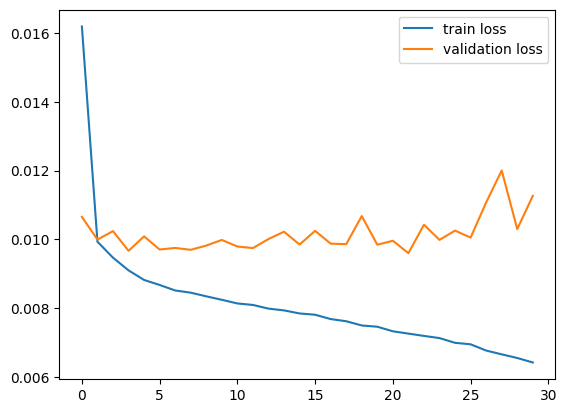

In [89]:
PARAMS_LENGTH = X_train.shape[2]
TARGET_LENGTH = y_train.shape[1]
BATCH_SIZE = 4
model = Sequential(name="LSTMtoLSTM_Mixed_batch4")
model.add(Input((WINDOW, PARAMS_LENGTH), batch_size=BATCH_SIZE))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(TARGET_LENGTH, activation="linear"))
model_lstm = model
model_lstm.compile(optimizer="adam", loss="mse")
model_lstm.summary()
history = model_lstm.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val), batch_size=BATCH_SIZE)
show_results(X_test, y_test, model_lstm, history, batch_size=BATCH_SIZE)

GRU64Mixed

Model: "GRU64Mixed"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_14 (GRU)                (None, 64)                21696     
                                                                 
 dense_92 (Dense)            (None, 13)                845       
                                                                 
Total params: 22,541
Trainable params: 22,541
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
57/57 [==============================] - 2s 9ms/step - loss: 0.0523 - val_loss: 0.0200
Epoch 2/30
57/57 [==============================] - 0s 3ms/step - loss: 0.0160 - val_loss: 0.0141
Epoch 3/30
57/57 [==============================] - 0s 3ms/step - loss: 0.0123 - val_loss: 0.0121
Epoch 4/30
57/57 [==============================] - 0s 3ms/step - loss: 0.0107 - val_loss: 0.0110
Epoch 5/30
57/57 [==============================] - 0s 4

INFO:tensorflow:Assets written to: models_w2/GRU64Mixed\assets


INFO:tensorflow:Assets written to: models_w2/GRU64Mixed\assets


,Температура_dinam_fact,Лимфоциты#_dinam_fact,АСТ_dinam_fact,ЧСС_dinam_fact,ЧДД_dinam_fact,Билирубин общий_dinam_fact,MPV- Средн.объем тромбоцитов_dinam_fact,PCT- Тромбокрит_dinam_fact,Лимфоциты%_dinam_fact,снижение_сознания_dinam_fact,Cтепень тяжести по КТ_dinam_fact,Лактатдегидрогеназа_dinam_fact,PDW- Индекс расп.по объему тр._dinam_fact
MSE,0.001880,0.000307,0.000373,0.007699,0.000259,0.000892,0.006686,0.006552,0.009639,0.013404,0.057100,0.000737,0.004558
R2,-0.276559,-8.706634,-0.216630,0.008726,-0.048732,0.353234,0.544936,0.356437,0.447517,0.808884,-0.035296,-0.375820,0.651145


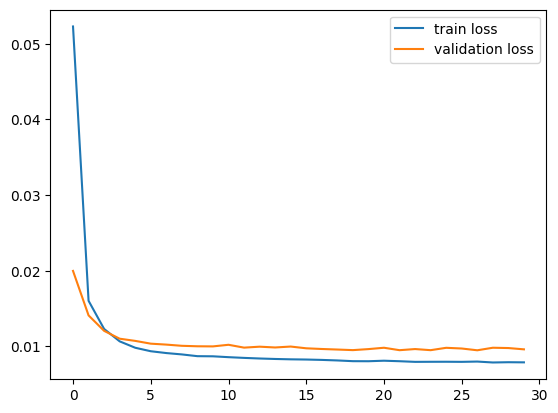

In [90]:
PARAMS_LENGTH = X_train.shape[2]
TARGET_LENGTH = y_train.shape[1]
model = Sequential(name="GRU64Mixed")
model.add(Input((WINDOW, PARAMS_LENGTH)))
model.add(GRU(64, return_sequences=False))
model.add(Dense(TARGET_LENGTH, activation="linear"))
model_lstm = model
model_lstm.compile(optimizer="adam", loss="mse")
model_lstm.summary()
history = model_lstm.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val))
show_results(X_test, y_test, model_lstm, history)

Model: "GRU60Mixed"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_15 (GRU)                (None, 60)                19620     
                                                                 
 dense_93 (Dense)            (None, 13)                793       
                                                                 
Total params: 20,413
Trainable params: 20,413
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
57/57 [==============================] - 2s 8ms/step - loss: 0.0469 - val_loss: 0.0188
Epoch 2/30
57/57 [==============================] - 0s 3ms/step - loss: 0.0157 - val_loss: 0.0137
Epoch 3/30
57/57 [==============================] - 0s 4ms/step - loss: 0.0122 - val_loss: 0.0119
Epoch 4/30
57/57 [==============================] - 0s 3ms/step - loss: 0.0107 - val_loss: 0.0115
Epoch 5/30
57/57 [==============================] - 0s 3

INFO:tensorflow:Assets written to: models_w2/GRU60Mixed\assets


INFO:tensorflow:Assets written to: models_w2/GRU60Mixed\assets


,Температура_dinam_fact,Лимфоциты#_dinam_fact,АСТ_dinam_fact,ЧСС_dinam_fact,ЧДД_dinam_fact,Билирубин общий_dinam_fact,MPV- Средн.объем тромбоцитов_dinam_fact,PCT- Тромбокрит_dinam_fact,Лимфоциты%_dinam_fact,снижение_сознания_dinam_fact,Cтепень тяжести по КТ_dinam_fact,Лактатдегидрогеназа_dinam_fact,PDW- Индекс расп.по объему тр._dinam_fact
MSE,0.001716,0.000345,0.000527,0.007531,0.000277,0.000989,0.007273,0.007033,0.009594,0.013758,0.057833,0.000481,0.004663
R2,-0.164659,-9.925552,-0.720276,0.030390,-0.121120,0.282828,0.504949,0.309147,0.450109,0.803836,-0.048593,0.103211,0.643061


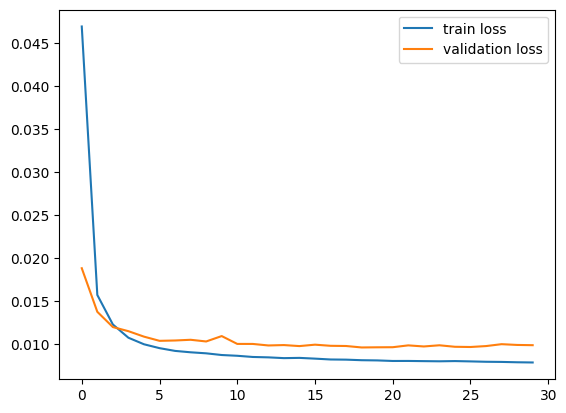

In [91]:
PARAMS_LENGTH = X_train.shape[2]
TARGET_LENGTH = y_train.shape[1]
model = Sequential(name=f"GRU{RNN_LENGTH}Mixed")
model.add(Input((WINDOW, PARAMS_LENGTH)))
model.add(GRU(RNN_LENGTH, return_sequences=False))
model.add(Dense(TARGET_LENGTH, activation="linear"))
model_lstm = model
model_lstm.compile(optimizer="adam", loss="mse")
model_lstm.summary()
history = model_lstm.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val))
show_results(X_test, y_test, model_lstm, history)

RNN - dynamic and static params aparted

StaticDense_DynamicLSTM_oneLayer

In [92]:
D_train = X_train[:, :, 29:]
S_train = X_train[:, 0, 0:29]
S_train = np.hstack([S_train, X_train[:, 0, 42:43]])
D_val = X_val[:, :, 29:]
S_val = X_val[:, 0, :29]
S_val = np.hstack([S_val, X_val[:, 0, 42:43]])


StaticDense_DynamicLSTM_oneLayer

Model: "StaticDense_DynamicLSTM_oneLayer"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_66 (InputLayer)          [(None, 2, 18)]      0           []                               
                                                                                                  
 input_65 (InputLayer)          [(None, 30)]         0           []                               
                                                                                                  
 lstm_32 (LSTM)                 (None, 18)           2664        ['input_66[0][0]']               
                                                                                                  
 dense_94 (Dense)               (None, 16)           496         ['input_65[0][0]']               
                                                                   

INFO:tensorflow:Assets written to: models_w2/StaticDense_DynamicLSTM_oneLayer\assets


INFO:tensorflow:Assets written to: models_w2/StaticDense_DynamicLSTM_oneLayer\assets


,Температура_dinam_fact,Лимфоциты#_dinam_fact,АСТ_dinam_fact,ЧСС_dinam_fact,ЧДД_dinam_fact,Билирубин общий_dinam_fact,MPV- Средн.объем тромбоцитов_dinam_fact,PCT- Тромбокрит_dinam_fact,Лимфоциты%_dinam_fact,снижение_сознания_dinam_fact,Cтепень тяжести по КТ_dinam_fact,Лактатдегидрогеназа_dinam_fact,PDW- Индекс расп.по объему тр._dinam_fact
MSE,0.002723,0.000320,0.004004,0.011806,0.000395,0.001566,0.005290,0.008157,0.009940,0.017788,0.049306,0.003864,0.005824
R2,-0.149579,-2.478906,0.117082,-0.067146,0.234049,0.064317,0.608074,0.194694,0.328144,0.674614,-0.046044,0.069879,0.543876


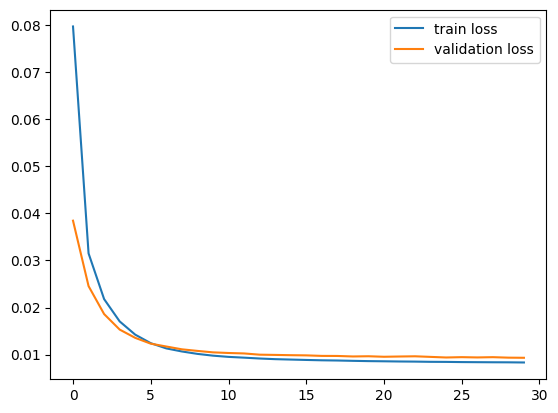

In [93]:
SPARAMS_LENGTH = S_train.shape[1]
DPARAMS_LENGTH = D_train.shape[2]
input_static = Input((SPARAMS_LENGTH))
input_dinamic = Input((WINDOW, DPARAMS_LENGTH))
dense_layer = Dense(16, activation='relu')(input_static)
lstm_layer = LSTM(DPARAMS_LENGTH, return_state=False)(input_dinamic)
result_layer = Dense(13, activation='linear')(concatenate([lstm_layer, dense_layer]))
model = Model(name="StaticDense_DynamicLSTM_oneLayer", inputs=[input_static, input_dinamic], outputs=result_layer)
model.summary()
model.compile(optimizer="adam", loss="mse")

history = model.fit(x=[S_train, D_train], y=y_train, validation_data=([S_val, D_val], y_val), epochs=30)
show_results([S_val, D_val], y_val, model, history)

StaticDense_DynamicGRU_twolayers

Model: "StaticDense_DynamicGRU_twolayers"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_68 (InputLayer)          [(None, 2, 18)]      0           []                               
                                                                                                  
 input_67 (InputLayer)          [(None, 30)]         0           []                               
                                                                                                  
 gru_16 (GRU)                   (None, 18)           2052        ['input_68[0][0]']               
                                                                                                  
 dense_96 (Dense)               (None, 32)           992         ['input_67[0][0]']               
                                                                   

INFO:tensorflow:Assets written to: models_w2/StaticDense_DynamicGRU_twolayers\assets


INFO:tensorflow:Assets written to: models_w2/StaticDense_DynamicGRU_twolayers\assets


,Температура_dinam_fact,Лимфоциты#_dinam_fact,АСТ_dinam_fact,ЧСС_dinam_fact,ЧДД_dinam_fact,Билирубин общий_dinam_fact,MPV- Средн.объем тромбоцитов_dinam_fact,PCT- Тромбокрит_dinam_fact,Лимфоциты%_dinam_fact,снижение_сознания_dinam_fact,Cтепень тяжести по КТ_dinam_fact,Лактатдегидрогеназа_dinam_fact,PDW- Индекс расп.по объему тр._dinam_fact
MSE,0.002760,0.000492,0.004030,0.013023,0.000585,0.001565,0.005661,0.008261,0.010345,0.018726,0.055024,0.003868,0.005803
R2,-0.165424,-4.339856,0.111475,-0.177113,-0.132499,0.064803,0.580636,0.184430,0.300707,0.657466,-0.167362,0.069038,0.545496


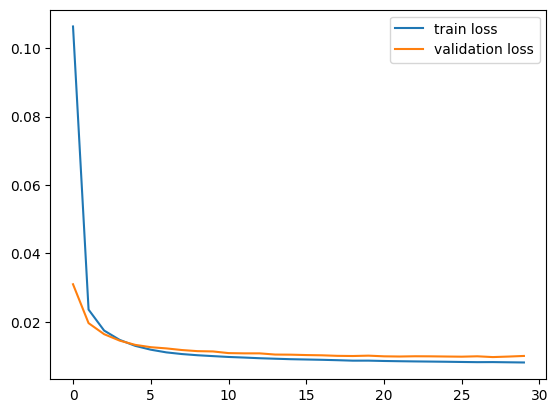

In [94]:
SPARAMS_LENGTH = S_train.shape[1]
DPARAMS_LENGTH = D_train.shape[2]
input_static = Input((SPARAMS_LENGTH))
input_dinamic = Input((WINDOW, DPARAMS_LENGTH))
dense_layer = Dense(32, activation='relu')(input_static)
lstm_layer = GRU(DPARAMS_LENGTH, return_state=False)(input_dinamic)
result_layer = Dense(32, activation="relu")(concatenate([lstm_layer, dense_layer]))
result_layer = Dense(13, activation='linear')(result_layer)
model = Model(name="StaticDense_DynamicGRU_twolayers", inputs=[input_static, input_dinamic], outputs=result_layer)
model.summary()
model.compile(optimizer="adam", loss="mse")
history = model.fit(x=[S_train, D_train], y=y_train, validation_data=([S_val, D_val], y_val), epochs=30)
show_results([S_val, D_val], y_val, model, history)

StaticDense_DynamicLSTM_batch4


Model: "StaticDense_DynamicLSTM_batch4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_69 (InputLayer)          [(4, 30)]            0           []                               
                                                                                                  
 input_70 (InputLayer)          [(4, 2, 18)]         0           []                               
                                                                                                  
 dense_99 (Dense)               (4, 32)              992         ['input_69[0][0]']               
                                                                                                  
 lstm_33 (LSTM)                 (4, 18)              2664        ['input_70[0][0]']               
                                                                     

INFO:tensorflow:Assets written to: models_w2/StaticDense_DynamicLSTM_batch4\assets


INFO:tensorflow:Assets written to: models_w2/StaticDense_DynamicLSTM_batch4\assets


,Температура_dinam_fact,Лимфоциты#_dinam_fact,АСТ_dinam_fact,ЧСС_dinam_fact,ЧДД_dinam_fact,Билирубин общий_dinam_fact,MPV- Средн.объем тромбоцитов_dinam_fact,PCT- Тромбокрит_dinam_fact,Лимфоциты%_dinam_fact,снижение_сознания_dinam_fact,Cтепень тяжести по КТ_dinam_fact,Лактатдегидрогеназа_dinam_fact,PDW- Индекс расп.по объему тр._dinam_fact
MSE,0.002540,0.000089,0.004795,0.013136,0.000419,0.001889,0.005443,0.007566,0.010431,0.018766,0.059214,0.003877,0.005784
R2,-0.072144,0.035169,-0.057214,-0.187379,0.187463,-0.128250,0.596724,0.253059,0.294907,0.656728,-0.256250,0.066802,0.546954


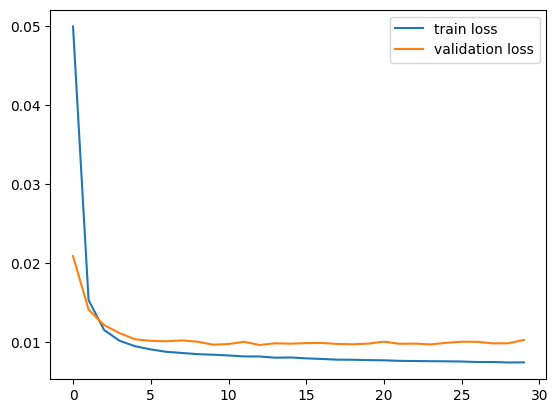

In [95]:
SPARAMS_LENGTH = S_train.shape[1]
DPARAMS_LENGTH = D_train.shape[2]
BATCH_SIZE=4
input_static = Input((SPARAMS_LENGTH), batch_size=BATCH_SIZE)
input_dinamic = Input((WINDOW, DPARAMS_LENGTH), batch_size=BATCH_SIZE)
dense_layer = Dense(32, activation='relu')(input_static)
lstm_layer = LSTM(DPARAMS_LENGTH, return_state=False)(input_dinamic)
result_layer = Dense(13, activation='linear')(concatenate([dense_layer, lstm_layer]))
model = Model(name="StaticDense_DynamicLSTM_batch4", inputs=[input_static, input_dinamic], outputs=result_layer)
model.summary()
model.compile(optimizer="adam", loss="mse")
history = model.fit(x=[S_train, D_train], y=y_train, validation_data=([S_val, D_val], y_val), epochs=30, batch_size=BATCH_SIZE)
show_results([S_val, D_val], y_val, model, history, batch_size=BATCH_SIZE)